# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Ипортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Считываем датасет с разделителем '\t'
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
# Устанавливаем нормальное отображение научных чисел
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df['last_price'].dtype

dtype('float64')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


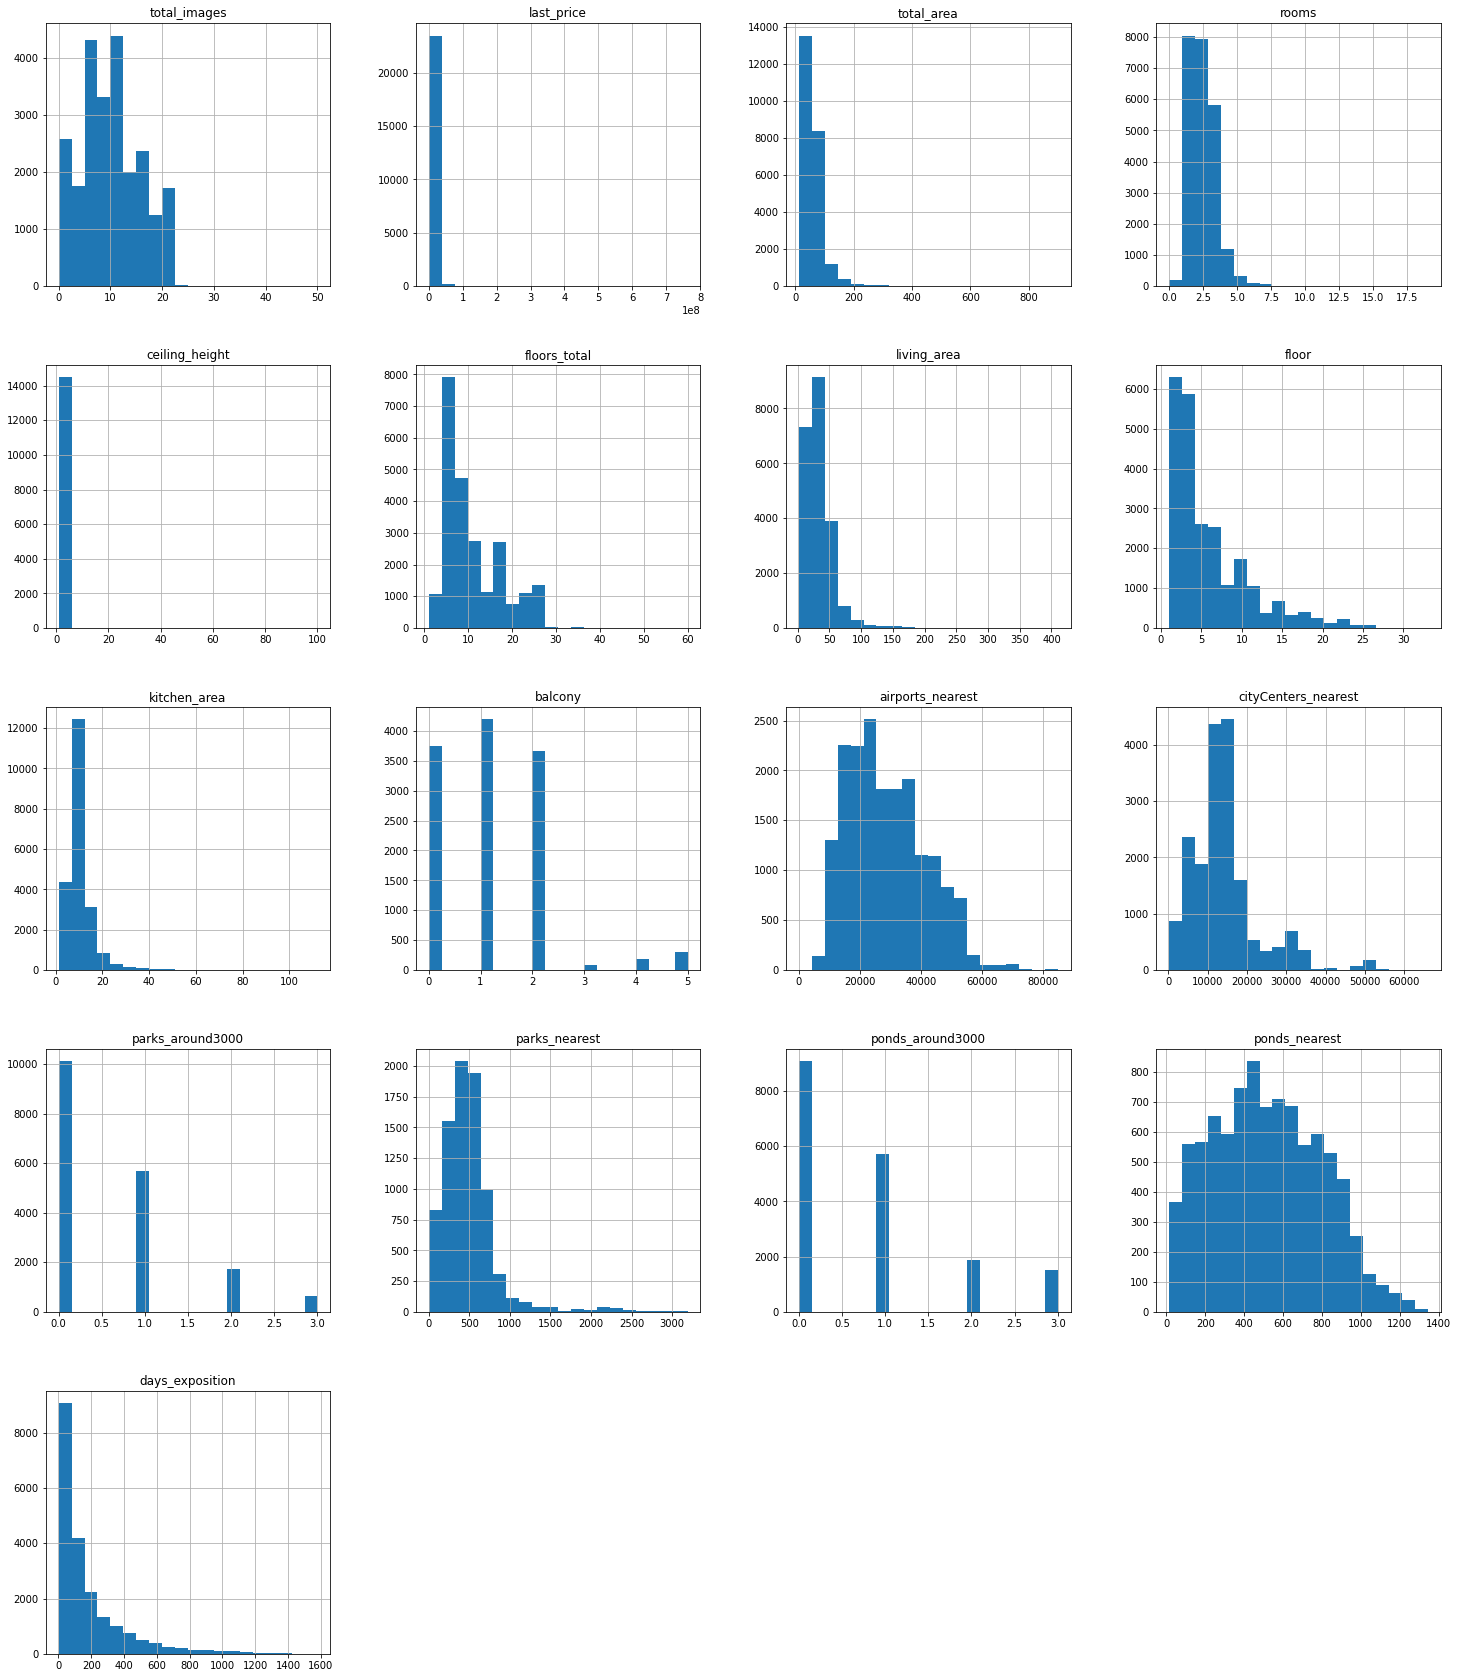

In [3]:
#Взглянем на первые 20 строчек датафрейма для дальнейшей проверки соответствия типу данных.
display(df.head(20))

#Построим общую гистограмму для всех числовых столбцов таблицы.

df.hist(bins = 20, figsize=(25, 30))
#Посмотрим на основную информацию датафрейма с помощью метода info.
df.info()

#Посмотрим на статистические данные, которые дают представление о распределении значений.
df.describe()

#### Обзор данных.

Для наглядности, запишем, какую информацию несёт в себе колонка.

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


 На входе у нас 23699 записи.  По некотороым диаграммам наблюдаем распределение Пуассона, что вполне закономерно для нашей области исследования.
По диаграммам и общей информации датасета видны выбросы, пропуски, редкие значения, так же несоответствия типа данных. Например, в колонке `ceiling_height` большое количество пропусков, а максимальное значение 100, что является невозможным. В колонке `first_day_exposition` несоответствующих тип данных. Со всеми аномалиями и пропусками разберёмся в следующей части.

### Предобработка данных.

#### Создадим словарь и пару полезных функций для дальнейшего использования в анализе.

In [4]:
# Словарь с описанием столбцов
dict_df ={
    'airports_nearest':'расстояние до ближайшего аэропорта в метрах (м)',
    'balcony': 'число балконов',
    'ceiling_height': 'высота потолков (м)',
    'city_centers_nearest': 'расстояние до центра города (м)',
    'days_exposition': 'сколько дней было размещено объявление (от публикации до снятия)',
    'first_day_exposition': 'дата публикации',
    'floor': 'этаж',
    'floors_total': 'всего этажей в доме',
    'is_apartment': 'апартаменты (булев тип)',
    'kitchen_area': 'площадь кухни в квадратных метрах (м²)',
    'last_price': 'цена на момент снятия с публикации',
    'living_area': 'жилая площадь в квадратных метрах (м²)',
    'locality_name': 'название населённого пункта',
    'open_plan': 'свободная планировка (булев тип)',
    'parks_around_3000':'число парков в радиусе 3 км',
    'parks_nearest': 'расстояние до ближайшего парка (м)',
    'ponds_around_3000': 'число водоёмов в радиусе 3 км',
    'ponds_nearest': 'расстояние до ближайшего водоёма (м)',
    'rooms': 'число комнат',
    'studio': 'квартира-студия (булев тип)',
    'total_area': 'площадь квартиры в квадратных метрах (м²)',
    'total_images': 'число фотографий квартиры в объявлении'
}

# Переведём в датафрейм
dict_name = pd.Series(dict_df)

In [5]:
# Для удобства дальнейшей работы, создадим функцию, которая будет возвращать нам всю необходимую информацию по значениям столбца.
def col_info(column_name):
    print('Колонка:',column_name, '-', dict_name[column_name])
    print('Тип данных:', df[column_name].dtypes)
    print('Количество пропусков:',df[column_name].isna().sum())
    if df[column_name].dtypes != 'object':
        print('Mинимальное значение:',df[column_name].min(),'\n' 'Максимальное значение:', df[column_name].max() )
    print()
    print('Топ 10 максимальных значений:','\n', df[column_name].sort_values(ascending = False).head(10))
    print()
    print('Топ 10 минимальных значений:','\n', df[column_name].sort_values(ascending = True).head(10))
    print()
    print('Список уникальных значений:','\n', df[column_name].value_counts())
    print()
    print('Количество уникальных значений:', len(df[column_name].unique()))
    print()
    if column_name.dtype == 'object'
        print('Количество дубликатов', df['name'].duplicated().sum())
#Проверим
col_info('days_exposition')

Колонка: days_exposition - сколько дней было размещено объявление (от публикации до снятия)
Тип данных: float64
Количество пропусков: 3181
Mинимальное значение: 1.0 
Максимальное значение: 1580.0

Топ 10 максимальных значений: 
 18843   1580.00
1109    1572.00
9553    1553.00
1885    1513.00
20969   1512.00
6691    1512.00
14093   1497.00
15313   1489.00
19123   1485.00
11955   1484.00
Name: days_exposition, dtype: float64

Топ 10 минимальных значений: 
 1632    1.00
16053   2.00
13061   2.00
16212   2.00
18680   3.00
6909    3.00
20448   3.00
9717    3.00
11070   3.00
2944    3.00
Name: days_exposition, dtype: float64

Список уникальных значений: 
 45.00      880
60.00      538
7.00       234
30.00      208
90.00      204
          ... 
969.00       1
1.00         1
1147.00      1
1148.00      1
1174.00      1
Name: days_exposition, Length: 1141, dtype: int64

Количество уникальных значений: 1142


In [6]:
# Посмотрим на пропущенные значения всего датафрейма, 
# создадим функцию которая вернёт количество пропущенных значений и процент пропусков по каждой колонке 
def show_nan(df):
    nan_count = df.isna().sum()
    percent_nan = round(df.isna().sum() * 100 / len(df), 2)
    
    show_nan_df = pd.DataFrame(
        {'NaN_count': nan_count, 
         'percent_NaN': percent_nan})
    print('Количество столбцов с пропусками: 14')
    return show_nan_df  
    

show_nan(df)

Количество столбцов с пропусками: 14


,NaN_count,percent_NaN
total_images,0,0.00
last_price,0,0.00
total_area,0,0.00
first_day_exposition,0,0.00
rooms,0,0.00
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
floor,0,0.00
is_apartment,20924,88.29


#### **Краткий отчёт по выявленным пропускам в данных и несоответвие типам:**


- Колонка `ceiling_height` (высота потолков), 38,8% пропусков, будем менять на медианные значения по группе `rooms`
- Колонка `balcony`, много пустых значений, но это нормально, далеко не в каждой квартире есть балкон, пропуски заменим нулями.
- В колонках `kitchen_area` и `living_area` часть значений пропущена, заполним их средним значением по колонке `rooms`.
- Колонка `is_apartment`, много пропусков, видимо есть техническая ошибка. Dtype столбца должен быть  `bool` а не `object`.
    В строке №11 стоит значение `False`, здравый смысл говорит нам о том, что, там должно быть значение `True`, а в пустых значениях `False`, исправим это.
- От строк с пропуском в колонке `locality_name` придётся избавиться полностью т.к. нет возможности их восстановить.
- Пропущенные картографические значения в колонках `airports/city_centers/parks/ponds` в основном заполнятся нулями, кроме тех населённых пунктов в которых будет медианное значение.
- В колонке `days_exposition` мы не можем заполнить медианой или средним значением, удалять такой объём данных тоже нельзя. Поэтому пропуски будем заполнять значением -1, для дальнейшего отсечения в рассчетах.

**Далее по ходу предобработки необходимо перевести тип данных некоторых столбоцов в соответвующий.**

**В формат `int` из формата `float`:**

- `last_price`
- `floors_total`
- `balcony`
- `parks_around3000`
- `parks_nearest`
- `ponds_around3000`
- `ponds_nearest`
- `airports_nearest`
- `cityCenters_nearest`
- `days_exposition`

**В формат `bool` из формата `object`:**

- `is_apartment`

**В формат `datetime64` из формата `object`**
- `first_day_exposition`



#### Предобработка. переименование столбцов.

In [7]:
# Для дальнейшего удобства работы переименуем столбцы согласно стиля snake_case
df = df.rename(columns=\
               {'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'})
# Проверяем измененеия
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Предобработка. Заполнение пропусков. `ceiling_height`

In [8]:
# Взглянем на общую информацию о столбце
col_info('ceiling_height')

Колонка: ceiling_height - высота потолков (м)
Тип данных: float64
Количество пропусков: 9195
Mинимальное значение: 1.0 
Максимальное значение: 100.0

Топ 10 максимальных значений: 
 22869   100.00
22336    32.00
3148     32.00
21377    27.50
20478    27.00
5246     27.00
5807     27.00
10773    27.00
17857    27.00
22938    27.00
Name: ceiling_height, dtype: float64

Топ 10 минимальных значений: 
 22590   1.00
5712    1.20
16934   1.75
2572    2.00
19329   2.00
11352   2.00
5850    2.00
19098   2.00
16884   2.00
22960   2.00
Name: ceiling_height, dtype: float64

Список уникальных значений: 
 2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

Количество уникальных значений: 184


**Вывод:**
Надо привести данные в порядок, т.к. эти данные заполнялись пользователями, мы наблюдаем огромный разброс значений.
- Пустые значения заполним медианным значением сгруппированным по колонке `rooms`.
- Потолки не могут быть высотой менее 2,5 метров, заменим все значения меньше 2,5 на 2,5.
- Значения больше 5 метров приведём к медианному значению сгруппированным по колонке `rooms`


In [9]:
# Заполним пустые значения медианой по группе rooms, применим простую функцию lambda 
df['ceiling_height'] = \
    df.groupby('rooms', sort=False)['ceiling_height'].apply \
    (lambda x: x.fillna(x.median()))

# Методом loc выделим все потолки меньше 2,5 метров и заменим их на значение 2,5
df.loc[df['ceiling_height'] < 2.5 , 'ceiling_height'] = 2.5

# Методом loc выделим все потолки выше 5 метров и заменим их на значение медианное по столбцу rooms
df.loc[df['ceiling_height'] > 5, 'ceiling_height'] = \
df.groupby('ceiling_height')['rooms'].transform('median')


# Проверяем
col_info('ceiling_height')

Колонка: ceiling_height - высота потолков (м)
Тип данных: float64
Количество пропусков: 1
Mинимальное значение: 0.0 
Максимальное значение: 6.0

Топ 10 максимальных значений: 
 464     6.00
1388    5.00
1053    5.00
21923   4.90
2802    4.80
1300    4.70
19142   4.70
12401   4.65
6802    4.50
2823    4.50
Name: ceiling_height, dtype: float64

Топ 10 минимальных значений: 
 21227   0.00
22309   1.00
5863    1.00
21377   1.00
5076    1.00
22869   1.00
3474    2.00
10773   2.00
15743   2.00
22938   2.00
Name: ceiling_height, dtype: float64

Список уникальных значений: 
 2.60    4736
2.50    3590
2.64    3515
2.65    2701
2.70    1574
        ... 
4.30       1
3.88       1
3.39       1
3.84       1
4.65       1
Name: ceiling_height, Length: 154, dtype: int64

Количество уникальных значений: 155


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


**После заполнения значений одно из них так и осталось незаполненным:**
Выведем на экран  строку с пустым значением

In [10]:
df.query('ceiling_height.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
14498,6,32250000.00,374.60,2018-06-09T00:00:00,19,NaN,5.00,264.50,2,NaN,...,27.60,NaN,Санкт-Петербург,19497.00,3574.00,0.00,NaN,2.00,548.00,114.00


Функция не сработала т.к. это единственная квартира в которой 19 комнат. Заполним значение вручную, медианным значением высоты потолка квартир в которых от 12 комнат. 

In [11]:
df.loc[14498, 'ceiling_height'] = df.loc[df['rooms'] >=12, 'ceiling_height'].median()
df.loc[df['ceiling_height'] < 2.5, 'ceiling_height'] = 2.5

#Проверяем
df.query('ceiling_height.isna()')

col_info('ceiling_height')

Колонка: ceiling_height - высота потолков (м)
Тип данных: float64
Количество пропусков: 0
Mинимальное значение: 2.5 
Максимальное значение: 6.0

Топ 10 максимальных значений: 
 464     6.00
1388    5.00
1053    5.00
21923   4.90
2802    4.80
19142   4.70
1300    4.70
12401   4.65
14519   4.50
2823    4.50
Name: ceiling_height, dtype: float64

Топ 10 минимальных значений: 
 23698   2.50
6669    2.50
19484   2.50
19487   2.50
19488   2.50
19493   2.50
6659    2.50
6656    2.50
6654    2.50
6670    2.50
Name: ceiling_height, dtype: float64

Список уникальных значений: 
 2.60    4736
2.50    3617
2.64    3515
2.65    2701
2.70    1574
        ... 
3.82       1
4.25       1
3.48       1
3.59       1
4.65       1
Name: ceiling_height, Length: 151, dtype: int64

Количество уникальных значений: 151


#### Предобработка. Заполнение пропусков. `floors_total`

In [12]:
# Посмотрим на общую информацию о столбце
col_info('floors_total')

Колонка: floors_total - всего этажей в доме
Тип данных: float64
Количество пропусков: 86
Mинимальное значение: 1.0 
Максимальное значение: 60.0

Топ 10 максимальных значений: 
 2253    60.00
16731   52.00
16934   37.00
397     36.00
5807    36.00
11079   36.00
4855    35.00
18617   35.00
5808    35.00
13975   35.00
Name: floors_total, dtype: float64

Топ 10 минимальных значений: 
 8335    1.00
5300    1.00
17020   1.00
17744   1.00
14836   1.00
15543   1.00
19590   1.00
18900   1.00
7962    1.00
22841   1.00
Name: floors_total, dtype: float64

Список уникальных значений: 
 5.00     5788
9.00     3761
16.00    1376
12.00    1362
4.00     1200
10.00    1174
25.00    1075
6.00      914
17.00     833
3.00      668
7.00      592
14.00     553
18.00     505
24.00     469
8.00      390
2.00      383
15.00     365
23.00     352
19.00     339
22.00     286
20.00     271
13.00     229
11.00     203
27.00     164
21.00     158
26.00     124
1.00       25
35.00      24
28.00      21
36.00       3


**Вывод:** Количество пропусков небольшое, 85. Мы не можем выяснить выяснить количество этажей в доме, придётся удалить строки из датафрейма содержащие пропуски в столбце `floors_total`.

In [13]:
df = df.dropna( subset=['floors_total'])

# Проверяем
df.query('floors_total.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


#### Предобработка. Заполнение пропусков. `balcony`

In [14]:
# Взглянем на общую информацию о столбце
col_info('balcony')

Колонка: balcony - число балконов
Тип данных: float64
Количество пропусков: 11480
Mинимальное значение: 0.0 
Максимальное значение: 5.0

Топ 10 максимальных значений: 
 14932   5.00
5807    5.00
7411    5.00
1788    5.00
18582   5.00
5826    5.00
18524   5.00
10407   5.00
7360    5.00
18432   5.00
Name: balcony, dtype: float64

Топ 10 минимальных значений: 
 8605    0.00
21318   0.00
6308    0.00
13087   0.00
13086   0.00
6316    0.00
21312   0.00
6318    0.00
6319    0.00
6320    0.00
Name: balcony, dtype: float64

Список уникальных значений: 
 1.00    4195
0.00    3713
2.00    3657
5.00     304
4.00     183
3.00      81
Name: balcony, dtype: int64

Количество уникальных значений: 7


**Вывод:** много пустых значений, но это нормально, далеко не в каждой квартире есть балкон, пропуски заменяем нулями.

In [15]:
# Методом fillna
df.balcony = df.balcony.fillna(0)

# Проверяем
df.query('balcony.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


#### Предобработка. Заполнение пропусков. `living_area` 

In [16]:
# Взглянем на общую информацию о столбце
col_info('living_area')

Колонка: living_area - жилая площадь в квадратных метрах (м²)
Тип данных: float64
Количество пропусков: 1870
Mинимальное значение: 2.0 
Максимальное значение: 409.7

Топ 10 максимальных значений: 
 19540   409.70
5358    409.00
12401   347.50
4237    332.00
12859   322.30
660     312.50
8018    301.50
14088   300.00
20273   279.60
22494   274.00
Name: living_area, dtype: float64

Топ 10 минимальных значений: 
 21758   2.00
13915   2.00
3242    3.00
23574   3.00
17582   5.00
21943   5.40
16431   6.00
19251   6.50
23208   8.00
20994   8.00
Name: living_area, dtype: float64

Список уникальных значений: 
 18.00    882
17.00    674
30.00    598
16.00    484
20.00    481
        ... 
50.26      1
43.81      1
54.43      1
86.10      1
16.74      1
Name: living_area, Length: 1769, dtype: int64

Количество уникальных значений: 1770


**Вывод:** Пропущенные значения заполнить медианой по столбцу  `rooms`.

In [17]:
# Заполним пустые значения медианой по группе rooms, применим простую функцию lambda 
df['living_area'] = \
    df.groupby('rooms', sort=False)['living_area'].apply \
    (lambda x: x.fillna(x.median()))
                          
    
# Так как мы заполняли жилую площадь медианами, возможны ошибки заполнения при которой living_area стала больше total_area
# Проверим пропуски после заполнения и ошибки
print('Количество ошибок заполнения:', df.query('living_area > total_area')['living_area'].count())
df.query('living_area.isna()')

Количество ошибок заполнения: 29


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


В столбцах с ошибками заменим значения `living_area` на общую площадь минус 3(на санузел).

In [18]:
# Методом loc выберем все ошибочные строки и исправим
df.loc[df['living_area'] > df['total_area'], 'living_area'] = df.loc[df['living_area'] > 
                                                              df['total_area'], 'total_area'] - 3

# Проверим
print('Количество ошибок заполнения:', df.query('living_area > total_area')['living_area'].count())

# Взглянем на столбец после всех исправлений
col_info('living_area')

Количество ошибок заполнения: 0
Колонка: living_area - жилая площадь в квадратных метрах (м²)
Тип данных: float64
Количество пропусков: 0
Mинимальное значение: 2.0 
Максимальное значение: 409.7

Топ 10 максимальных значений: 
 19540   409.70
5358    409.00
12401   347.50
4237    332.00
12859   322.30
660     312.50
8018    301.50
14088   300.00
20273   279.60
22494   274.00
Name: living_area, dtype: float64

Топ 10 минимальных значений: 
 21758   2.00
13915   2.00
3242    3.00
23574   3.00
17582   5.00
21943   5.40
16431   6.00
19251   6.50
23208   8.00
20994   8.00
Name: living_area, dtype: float64

Список уникальных значений: 
 18.00    893
17.60    737
30.50    699
17.00    674
30.00    598
        ... 
35.77      1
96.40      1
50.26      1
43.81      1
16.74      1
Name: living_area, Length: 1772, dtype: int64

Количество уникальных значений: 1772


#### Предобработка. Заполнение пропусков. `kitchen_area`  

In [19]:
# Взглянем на общую информацию о столбце
col_info('kitchen_area')

Колонка: kitchen_area - площадь кухни в квадратных метрах (м²)
Тип данных: float64
Количество пропусков: 2231
Mинимальное значение: 1.3 
Максимальное значение: 112.0

Топ 10 максимальных значений: 
 19540   112.00
20215   107.00
2489    100.70
5358    100.00
16239    93.20
16797    93.00
10867    87.20
4394     77.00
492      77.00
14644    75.00
Name: kitchen_area, dtype: float64

Топ 10 минимальных значений: 
 20217   1.30
21419   2.00
9138    2.00
6262    2.00
16367   2.00
19642   2.00
11033   2.00
906     2.00
17834   2.30
8729    2.40
Name: kitchen_area, dtype: float64

Список уникальных значений: 
 6.00     1300
10.00    1262
8.00     1110
9.00     1100
7.00     1062
         ... 
7.78        1
7.12        1
13.73       1
14.74       1
16.74       1
Name: kitchen_area, Length: 966, dtype: int64

Количество уникальных значений: 967


**Вывод:** Пропущенные значения заполнить медианой по столбцу `rooms`.

In [20]:
# Заполним пустые значения медианой по группе rooms, применим простую функцию lambda 
df['kitchen_area'] = \
    df.groupby('rooms', sort=False)['kitchen_area'].apply \
    (lambda x: x.fillna(x.median()))

# Проверим 
col_info('kitchen_area')

Колонка: kitchen_area - площадь кухни в квадратных метрах (м²)
Тип данных: float64
Количество пропусков: 194
Mинимальное значение: 1.3 
Максимальное значение: 112.0

Топ 10 максимальных значений: 
 19540   112.00
20215   107.00
2489    100.70
5358    100.00
16239    93.20
16797    93.00
10867    87.20
4394     77.00
492      77.00
14644    75.00
Name: kitchen_area, dtype: float64

Топ 10 минимальных значений: 
 20217   1.30
6262    2.00
16367   2.00
906     2.00
21419   2.00
19642   2.00
11033   2.00
9138    2.00
17834   2.30
8729    2.40
Name: kitchen_area, dtype: float64

Список уникальных значений: 
 9.00     1912
6.00     1300
10.00    1262
8.00     1110
7.00     1062
         ... 
7.78        1
7.12        1
13.73       1
14.74       1
16.74       1
Name: kitchen_area, Length: 967, dtype: int64

Количество уникальных значений: 968


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Осталось 197 пропущенных значений, посмотрим методом `describe` на пропущенные значения `kitchen_area`

In [21]:
df.query('kitchen_area.isna()').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,194.00,194.00,194.00,194.00,194.00,194.00,194.00,194.00,0.00,194.00,117.00,117.00,117.00,28.00,117.00,68.00,180.00
mean,7.84,3344493.04,29.32,0.00,2.76,16.90,18.82,8.54,NaN,1.03,24531.66,13403.74,0.29,586.29,0.82,524.19,110.32
std,5.09,5084413.83,26.05,0.00,0.13,6.93,6.36,6.31,NaN,0.92,12439.14,5047.41,0.56,304.77,0.88,276.42,159.88
min,0.00,945750.00,15.50,0.00,2.50,3.00,2.00,1.00,NaN,0.00,6989.00,1261.00,0.00,38.00,0.00,72.00,3.00
25%,4.00,2300000.00,24.06,0.00,2.75,12.00,16.23,3.00,NaN,0.00,14509.00,11618.00,0.00,392.75,0.00,345.25,27.75
50%,7.00,2700000.00,26.08,0.00,2.75,17.00,18.00,7.00,NaN,1.00,21460.00,13615.00,0.00,532.00,1.00,527.50,49.50
75%,11.00,3395000.00,28.38,0.00,2.75,23.00,19.50,13.00,NaN,2.00,34201.00,16414.00,0.00,757.25,1.00,683.25,119.25
max,21.00,71000000.00,371.00,0.00,3.57,35.00,68.00,26.00,NaN,2.00,55551.00,29846.00,2.00,1199.00,3.00,1159.00,931.00


**Выявлена проблема в данных** с которой нам ещё предстоит разобратся. Количество комнат в этих строках = 0.
Пропуски `kitchen_area` заполним мединным значением всей колонки

In [22]:
# Заполним пропуски методом loc
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['kitchen_area'].median()

# Проверим 
col_info('kitchen_area')

Колонка: kitchen_area - площадь кухни в квадратных метрах (м²)
Тип данных: float64
Количество пропусков: 0
Mинимальное значение: 1.3 
Максимальное значение: 112.0

Топ 10 максимальных значений: 
 19540   112.00
20215   107.00
2489    100.70
5358    100.00
16239    93.20
16797    93.00
10867    87.20
4394     77.00
492      77.00
14644    75.00
Name: kitchen_area, dtype: float64

Топ 10 минимальных значений: 
 20217   1.30
11033   2.00
906     2.00
19642   2.00
6262    2.00
21419   2.00
9138    2.00
16367   2.00
17834   2.30
8729    2.40
Name: kitchen_area, dtype: float64

Список уникальных значений: 
 9.00     2106
6.00     1300
10.00    1262
8.00     1110
7.00     1062
         ... 
7.78        1
7.12        1
13.73       1
14.74       1
16.74       1
Name: kitchen_area, Length: 967, dtype: int64

Количество уникальных значений: 967


#### Предобработка. Заполнение пропусков. `is_apartment`  

In [23]:
# Взглянем на общую информацию о столбце
col_info('is_apartment')

Колонка: is_apartment - апартаменты (булев тип)
Тип данных: object
Количество пропусков: 20838

Топ 10 максимальных значений: 
 8018     True
16166    True
5076     True
14459    True
12160    True
5654     True
21244    True
11179    True
17196    True
6353     True
Name: is_apartment, dtype: object

Топ 10 минимальных значений: 
 11       False
15765    False
15774    False
15779    False
15780    False
15781    False
15787    False
15789    False
15790    False
15793    False
Name: is_apartment, dtype: object

Список уникальных значений: 
 False    2725
True       50
Name: is_apartment, dtype: int64

Количество уникальных значений: 3


**Вывод:** Если недвижимость является аппартаментами, клиент это указывает самостоятельно. Пропущенные значения являются незаполненными, поэтому мы можем заполнить их только значением `False`.

In [24]:
# Пропуски заполним значением False с помощью метода fillna
df['is_apartment'] = df['is_apartment'].fillna(False)

# Проверяем
col_info('is_apartment')

Колонка: is_apartment - апартаменты (булев тип)
Тип данных: bool
Количество пропусков: 0
Mинимальное значение: False 
Максимальное значение: True

Топ 10 максимальных значений: 
 18431    True
6523     True
3816     True
17196    True
20008    True
7206     True
19034    True
16166    True
7521     True
5809     True
Name: is_apartment, dtype: bool

Топ 10 минимальных значений: 
 0        False
15798    False
15797    False
15796    False
15795    False
15794    False
15793    False
15792    False
15791    False
15790    False
Name: is_apartment, dtype: bool

Список уникальных значений: 
 False    23563
True        50
Name: is_apartment, dtype: int64

Количество уникальных значений: 2


#### Предобработка. Заполнение пропусков. `locality_name`  

In [25]:
col_info('locality_name')

Колонка: locality_name - название населённого пункта
Тип данных: object
Количество пропусков: 48

Топ 10 максимальных значений: 
 15459                село Шум
19176      село Старая Ладога
4672       село Старая Ладога
22417    село Русско-Высоцкое
4483     село Русско-Высоцкое
21082    село Русско-Высоцкое
6816     село Русско-Высоцкое
18739    село Русско-Высоцкое
9460     село Русско-Высоцкое
21252    село Русско-Высоцкое
Name: locality_name, dtype: object

Топ 10 минимальных значений: 
 3731     Бокситогорск
638      Бокситогорск
764      Бокситогорск
3010     Бокситогорск
5821     Бокситогорск
17075    Бокситогорск
23153    Бокситогорск
22267    Бокситогорск
1761     Бокситогорск
18807    Бокситогорск
Name: locality_name, dtype: object

Список уникальных значений: 
 Санкт-Петербург                       15651
посёлок Мурино                          520
посёлок Шушары                          439
Всеволожск                              398
Пушкин                                  3

**Вывод:** Пропущенные строки нет возможности восстановить, удаляем. Так же поработаем с уникальными значениями, выявим неявные дубликаты и обработаем.

In [26]:
# Удалим строки с пропусками
df = df.dropna(subset = ['locality_name'])

# Проверим
df.query('locality_name.isna()')

# Посмотрим весь список уникальных значений locality_name
print(df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

**Вывод:** Здесь следует обработать группу посёлки и садовые товарищевства, т.к. у многих различный тип описания одной и той же категории населённого пункта. Удалим промежуточные слова типа *`городской, городского, станции, и т.п.`* Садовые товарищевства сократим до аббревиатуры *`СНТ`*, приведём все посёлки к единому стилю написания, через букву *`е`*. Так же мы создадим новый столбец, с категорией населённого пункта, и распределим их значения по соответвию.

In [27]:
# Удалим лишние атрибуты населённых пунктов.

df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('городской', '')
df['locality_name'] = df['locality_name'].str.replace('городского', '')
df['locality_name'] = df['locality_name'].str.replace('типа', '')
df['locality_name'] = df['locality_name'].str.replace('станции', '')
df['locality_name'] = df['locality_name'].str.replace('при', '')
df['locality_name'] = df['locality_name'].str.replace('железнодорожного', '')
df['locality_name'] = df['locality_name'].str.replace('железнодорожной', '')
df['locality_name'] = df['locality_name'].str.replace('садовое', 'СНТ')
df['locality_name'] = df['locality_name'].str.replace('садоводческое', 'СНТ')
df['locality_name'] = df['locality_name'].str.replace('товарищество', '')
df['locality_name'] = df['locality_name'].str.replace('некоммерческое', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный', '')

# Добавляем в качестве разделителя пробел.
df[df['locality_name'].str.split(' ', expand=True)]


# С помощью функции разместим каждую строку в соответвующую категорию.
def categorize_locality(column):
        if 'поселок' in column:
            return 'Посёлки'
        elif 'деревня' in column:
            return 'Деревни'
        elif 'село' in column:
            return 'Сёла'
        elif 'СН' in column:
            return 'СНТ'
        elif 'Санкт-Петербург' in column:
            return 'Санкт-Петербург' 
        else:
            return 'Города'
    
# Создадим новый столбец и применим метод apply к нашей функции.   
df['locality_category'] = df['locality_name'].apply(categorize_locality)

# Проверим количество уникальных значений
print('Количество уникальных значений:', len(df['locality_name'].unique()))

# Проверим новый столбец 
display(df)

Количество уникальных значений: 330


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,...,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,Санкт-Петербург
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,2.64,11.00,18.60,1,False,...,2.00,поселок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,Посёлки
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,2.60,5.00,34.30,4,False,...,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,Санкт-Петербург
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.65,14.00,45.00,9,False,...,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,Санкт-Петербург
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,...,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,False,...,0.00,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN,Санкт-Петербург
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,2.65,5.00,38.00,4,False,...,0.00,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00,Города
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,2.60,3.00,29.70,1,False,...,0.00,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Сёла
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,30.50,12,False,...,2.00,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00,Санкт-Петербург


**Вывод:** Лишние атрибуты удалены, уникальных значений было 365, стало 330. Добавлен новый столбец с категорией по типу населённого пункта. 

#### Предобработка. Заполнение пропусков. `days_exposition`

In [28]:
# Взглянем на общую информацию о столбце
col_info('days_exposition')

Колонка: days_exposition - сколько дней было размещено объявление (от публикации до снятия)
Тип данных: float64
Количество пропусков: 3171
Mинимальное значение: 1.0 
Максимальное значение: 1580.0

Топ 10 максимальных значений: 
 18843   1580.00
1109    1572.00
9553    1553.00
1885    1513.00
20969   1512.00
6691    1512.00
14093   1497.00
15313   1489.00
19123   1485.00
11955   1484.00
Name: days_exposition, dtype: float64

Топ 10 минимальных значений: 
 1632    1.00
16053   2.00
13061   2.00
16212   2.00
5696    3.00
23116   3.00
8803    3.00
22127   3.00
23144   3.00
12461   3.00
Name: days_exposition, dtype: float64

Список уникальных значений: 
 45.00      879
60.00      538
7.00       234
30.00      208
90.00      200
          ... 
969.00       1
1147.00      1
1.00         1
1148.00      1
1174.00      1
Name: days_exposition, Length: 1139, dtype: int64

Количество уникальных значений: 1140


**Вывод:** Пропуски будем заполнять значением -1.

In [29]:
# Сделаем выборку обьявлний с пропусками в days_exposition:
df['days_exposition'] = df['days_exposition'].fillna(-1)

# Проверяем
df.query('days_exposition.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category


#### Предобработка. Заполнение пропусков. `airport_nearest` 

In [30]:
# Взглянем на общую информацию о столбце
col_info('airports_nearest')

Колонка: airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
Тип данных: float64
Количество пропусков: 5524
Mинимальное значение: 0.0 
Максимальное значение: 84869.0

Топ 10 максимальных значений: 
 9640    84869.00
5340    84853.00
577     84665.00
20746   84006.00
5218    83758.00
18884   81607.00
2974    81355.00
4441    78527.00
939     75646.00
376     73827.00
Name: airports_nearest, dtype: float64

Топ 10 минимальных значений: 
 21085      0.00
12899   6450.00
4017    6450.00
7778    6914.00
23150   6949.00
5062    6989.00
22283   6989.00
10059   6989.00
15633   6989.00
5074    6989.00
Name: airports_nearest, dtype: float64

Список уникальных значений: 
 37434.00    61
21928.00    32
39946.00    30
44870.00    30
37407.00    27
            ..
42695.00     1
53478.00     1
20335.00     1
33699.00     1
20875.00     1
Name: airports_nearest, Length: 8251, dtype: int64

Количество уникальных значений: 8252


   **Вывод:** В этой колонке мы не сможем заполнить пропущенные значения. Потому что, Ленинградская область довольно большая а максимально доступное нам значение составляет всего 85 км. Например, ближайший аэропорт от г. Выборг находится в 150км. Поэтому пропуски заполним нулями.  
   
    Для справки: 
    С запада на восток Ленинградская область протянулась на 500 км, а наибольшая протяжённость с севера на юг составляет 320 км.


In [31]:
# Заполняем нулевым значением
df['airports_nearest'] = df['airports_nearest'].fillna(0)

# Проверяем
df.query('airports_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category


#### Предобработка. Заполнение пропусков. `city_centers_nearest` 

In [32]:
col_info('city_centers_nearest')

Колонка: city_centers_nearest - расстояние до центра города (м)
Тип данных: float64
Количество пропусков: 5501
Mинимальное значение: 181.0 
Максимальное значение: 65968.0

Топ 10 максимальных значений: 
 9640    65968.00
5340    65952.00
577     65764.00
20746   65105.00
5218    64857.00
18884   62706.00
2974    62454.00
16569   61495.00
23123   60223.00
4441    59626.00
Name: city_centers_nearest, dtype: float64

Топ 10 минимальных значений: 
 13694   181.00
1182    208.00
8614    215.00
1934    287.00
20873   291.00
7726    318.00
10377   318.00
11723   318.00
11492   318.00
5297    318.00
Name: city_centers_nearest, dtype: float64

Список уникальных значений: 
 8460.00     61
20802.00    32
10720.00    30
8434.00     27
20444.00    27
            ..
8565.00      1
5278.00      1
11575.00     1
3205.00      1
4234.00      1
Name: city_centers_nearest, Length: 7623, dtype: int64

Количество уникальных значений: 7624


**Вывод:** Заполним пропуски значений медианой, рассчитанной по каждой группе `locality_category`.

In [33]:
df['city_centers_nearest'] = \
    df.groupby('locality_name', sort=False)['city_centers_nearest'].apply \
    (lambda x: x.fillna(x.median()))

# Проверяем
col_info('city_centers_nearest')

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Колонка: city_centers_nearest - расстояние до центра города (м)
Тип данных: float64
Количество пропусков: 5432
Mинимальное значение: 181.0 
Максимальное значение: 65968.0

Топ 10 максимальных значений: 
 9640    65968.00
5340    65952.00
577     65764.00
20746   65105.00
5218    64857.00
18884   62706.00
2974    62454.00
16569   61495.00
23123   60223.00
4441    59626.00
Name: city_centers_nearest, dtype: float64

Топ 10 минимальных значений: 
 13694   181.00
1182    208.00
8614    215.00
1934    287.00
20873   291.00
5297    318.00
10867   318.00
1109    318.00
11723   318.00
13919   318.00
Name: city_centers_nearest, dtype: float64

Список уникальных значений: 
 12242.00    64
8460.00     61
20802.00    32
10720.00    30
20444.00    27
            ..
15882.00     1
8565.00      1
5278.00      1
11575.00     1
4234.00      1
Name: city_centers_nearest, Length: 7626, dtype: int64

Количество уникальных значений: 7627


Количество пропусков после заполнения осталось 4864. Причина неполного заполнения - не во всех населенных пунктах есть сведения о расстоянии до центра, мы заполним оставшиеся пропуски нулями.

In [34]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(0)

# Проверяем
df.query('city_centers_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category


#### Предобработка. Заполнение пропусков. `parks_around_3000`

In [35]:
# Смотрим на столбец
col_info('parks_around_3000')

Колонка: parks_around_3000 - число парков в радиусе 3 км
Тип данных: float64
Количество пропусков: 5500
Mинимальное значение: 0.0 
Максимальное значение: 3.0

Топ 10 максимальных значений: 
 18947   3.00
20041   3.00
11945   3.00
11961   3.00
11971   3.00
16559   3.00
21976   3.00
16543   3.00
16539   3.00
857     3.00
Name: parks_around_3000, dtype: float64

Топ 10 минимальных значений: 
 11838   0.00
10008   0.00
10010   0.00
18509   0.00
10014   0.00
10017   0.00
10019   0.00
18508   0.00
18506   0.00
18505   0.00
Name: parks_around_3000, dtype: float64

Список уникальных значений: 
 0.00    10039
1.00     5647
2.00     1736
3.00      643
Name: parks_around_3000, dtype: int64

Количество уникальных значений: 5


**Вывод:** Данный столбец будем заполнять нулями, исходя из следующей логии: Это данные от клиентов, при заполнении объявления клиент самостоятельно отмечает преимущества жилья, а наличие парков рядом несомненно хорошее преимущество при продаже жилой недвижимости. Следовательно, если о наличии парка не заявлено - он отсутствует. Медианой или средним значением в этом контексте заполнять будет не логично.

In [36]:
df['parks_around_3000'] = df['parks_around_3000'].fillna(0)

# Проверяем
df.query('parks_around_3000.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category


#### Предобработка. Заполнение пропусков.  `parks_nearest`

In [37]:
# Смотрим на столбец
col_info('parks_nearest')

Колонка: parks_nearest - расстояние до ближайшего парка (м)
Тип данных: float64
Количество пропусков: 15535
Mинимальное значение: 1.0 
Максимальное значение: 3190.0

Топ 10 максимальных значений: 
 10959   3190.00
19430   3190.00
1590    3064.00
19208   3013.00
23080   2984.00
2659    2905.00
1860    2888.00
7855    2880.00
3865    2847.00
22003   2768.00
Name: parks_nearest, dtype: float64

Топ 10 минимальных значений: 
 14624    1.00
11949    3.00
22941    4.00
9344     7.00
20193    9.00
2527     9.00
7788    10.00
15296   10.00
4470    10.00
189     10.00
Name: parks_nearest, dtype: float64

Список уникальных значений: 
 441.00     67
392.00     41
173.00     41
456.00     40
471.00     31
           ..
863.00      1
828.00      1
1909.00     1
1049.00     1
929.00      1
Name: parks_nearest, Length: 994, dtype: int64

Количество уникальных значений: 995


**Вывод:** Заполнять будем медианным значением по группам значений столбца `parks_around_3000`. Там где есть парки в радиусе 3км, должно быть и расстояние до парка. 

In [38]:
df['parks_nearest'] = \
    df.groupby('parks_around_3000', sort=False)['parks_nearest'].apply \
    (lambda x: x.fillna(x.mean()))

# Проверяем
df.query('parks_nearest.isna()')



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category


#### Предобработка. Заполнение пропусков.  `ponds_around_3000`

In [39]:
# Смотрим на столбец
col_info('ponds_around_3000')

Колонка: ponds_around_3000 - число водоёмов в радиусе 3 км
Тип данных: float64
Количество пропусков: 5500
Mинимальное значение: 0.0 
Максимальное значение: 3.0

Топ 10 максимальных значений: 
 23697   3.00
13364   3.00
2219    3.00
13222   3.00
13245   3.00
2211    3.00
13271   3.00
2201    3.00
13277   3.00
13283   3.00
Name: ponds_around_3000, dtype: float64

Топ 10 минимальных значений: 
 19634   0.00
8911    0.00
15953   0.00
8915    0.00
8919    0.00
8920    0.00
8921    0.00
8910    0.00
15951   0.00
8925    0.00
Name: ponds_around_3000, dtype: float64

Список уникальных значений: 
 0.00    9029
1.00    5662
2.00    1883
3.00    1491
Name: ponds_around_3000, dtype: int64

Количество уникальных значений: 5


**Вывод:** Заполнять пропуски будем нулями исходя из той же логики что делали со столбцом `parks_around_3000`

In [40]:
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0)

#Проверяем
df.query('ponds_around_3000.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category


#### Предобработка. Заполнение пропусков. `ponds_nearest`

In [41]:
col_info('ponds_nearest')

Колонка: ponds_nearest - расстояние до ближайшего водоёма (м)
Тип данных: float64
Количество пропусков: 14529
Mинимальное значение: 13.0 
Максимальное значение: 1344.0

Топ 10 максимальных значений: 
 20726   1344.00
19138   1341.00
19924   1341.00
1476    1337.00
12054   1313.00
18396   1299.00
21454   1293.00
14927   1278.00
20509   1278.00
4122    1275.00
Name: ponds_nearest, dtype: float64

Топ 10 минимальных значений: 
 1548    13.00
17585   13.00
10358   16.00
1733    16.00
9311    16.00
22077   16.00
23343   16.00
20427   16.00
8785    16.00
18845   16.00
Name: ponds_nearest, dtype: float64

Список уникальных значений: 
 427.00     69
454.00     41
153.00     40
433.00     39
564.00     37
           ..
105.00      1
59.00       1
1069.00     1
1270.00     1
995.00      1
Name: ponds_nearest, Length: 1096, dtype: int64

Количество уникальных значений: 1097


**Вывод:** Действовать будем аналогично как и с столбцом `parks_nearest`.

In [42]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

#Проверяем
df.query('ponds_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category


#### Предобработка. Заполнение пропусков. Результат.

In [43]:
# Взглянем на результат нашей работы, все значения должны быть заполненны.
show_nan(df)

Количество столбцов с пропусками: 14


,NaN_count,percent_NaN
total_images,0,0.00
last_price,0,0.00
total_area,0,0.00
first_day_exposition,0,0.00
rooms,0,0.00
ceiling_height,0,0.00
floors_total,0,0.00
living_area,0,0.00
floor,0,0.00
is_apartment,0,0.00


**Вывод:** Пропуски были заполнены там, где это возможно. Причина их появления это совокупность технических ошибок и человеческого фактора.

#### Предобработка. Изменение типов данных.

**В формат `int` из формата `float` необходимо перевести столбцы:**

- `last_price`
- `floors_total`
- `balcony`
- `parks_around_3000`
- `parks_nearest`
- `ponds_around_3000`
- `ponds_nearest`
- `airports_nearest`
- `city_сenters_nearest`
- `days_exposition`

**В формат `datetime64` из формата `object`**
- `first_day_exposition`

In [44]:
# Создаём список наименований столбцов, в которых нужно изменить тип данных
df_format = ['last_price', 'floors_total', 'balcony', 
             'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 
            'ponds_nearest', 'airports_nearest', 'city_centers_nearest', 'days_exposition']

# Применяем метод astype() для изменения формата столбцов из df_format
df[df_format] = df[df_format].astype(int).round(1)

df['first_day_exposition'] = df['first_day_exposition'].astype('datetime64')

# Проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

#### Предобработка. Поиск и обработка аномалий.

In [45]:
# Методом Describe посмотрим на датафрейм и внимательно изучим значения в каждой колонке.
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00
mean,9.88,6540058.26,60.32,2.07,2.69,10.68,34.31,5.88,10.44,0.59,22046.60,10923.10,0.47,2220.04,0.59,198.74,156.29
std,5.68,10910934.72,35.66,1.08,0.22,6.59,21.70,4.87,5.64,0.96,16462.14,9632.74,0.75,1259.32,0.88,305.20,213.62
min,0.00,12190.00,12.00,0.00,2.50,1.00,2.00,1.00,1.30,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-1.00
25%,6.00,3400000.00,40.00,1.00,2.60,5.00,18.40,2.00,7.30,0.00,10143.00,2371.00,0.00,601.00,0.00,0.00,22.00
50%,9.00,4646000.00,52.00,2.00,2.64,9.00,30.30,4.00,9.00,0.00,21854.00,11299.00,0.00,3114.00,0.00,0.00,73.00
75%,14.00,6790000.00,69.70,3.00,2.70,16.00,42.60,8.00,11.50,1.00,34324.00,15247.00,1.00,3114.00,1.00,389.00,198.00
max,50.00,763000000.00,900.00,19.00,6.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


**Вывод:** Найдены следующие аномалии.
- Колонка `last_price`, минимальное значение 12 190. Вероятно было заполнено в тыс.руб. Скорректируем в рассчете на рубли.
- Колонка `rooms`, минимальное значение 0, должно быть таким только для квартир студий либо для квартир с открытой планировкой, проверим. 

In [46]:
# Находим нужную строчку с значением last_price 12190.00

display(df.query('last_price == 12190'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category
8793,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,...,0,Санкт-Петербург,36421,9176,1,805,0,0,8,Санкт-Петербург


In [47]:
df.loc[8793, 'last_price'] = 12190000

# Для уверенности в остальных данных посмотрим топ 10 минимальных значений last_price
display(df.query('last_price < 1000000').sort_values(by ='last_price', ascending = False).tail(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category
21912,0,470000,37.00,2018-02-18,1,2.64,3,17.60,3,False,...,0,поселок Совхозный,0,0,0,3114,0,0,45,Посёлки
18867,1,470000,41.00,2018-02-11,1,2.64,5,32.00,3,False,...,0,деревня Выскатка,0,0,0,3114,0,0,46,Деревни
23484,11,470000,44.50,2018-07-02,2,2.60,2,28.00,2,False,...,0,Сланцы,0,0,0,3114,0,0,298,Города
16219,14,450000,38.50,2018-07-11,2,2.65,2,30.50,1,False,...,0,деревня Вахнова Кара,0,0,0,3114,0,0,45,Деревни
5698,7,450000,42.00,2017-07-31,2,2.60,1,23.00,1,False,...,0,поселок Будогощь,0,0,0,3114,0,0,233,Посёлки
17676,0,450000,36.50,2018-02-01,1,2.64,5,17.30,4,False,...,1,деревня Ям-Тесово,0,0,0,3114,0,0,120,Деревни
9581,7,450000,43.40,2018-08-31,2,2.60,5,30.30,3,False,...,0,деревня Старополье,0,0,0,3114,0,0,96,Деревни
16274,18,440000,40.00,2018-07-10,1,2.64,5,17.60,1,False,...,0,деревня Старополье,0,0,0,3114,0,0,45,Деревни
14911,5,430000,54.00,2018-06-26,2,2.60,3,30.50,3,False,...,0,поселок Свирь,0,0,0,3114,0,0,44,Посёлки
17456,7,430000,30.40,2019-04-22,1,2.64,2,16.00,1,False,...,0,Сланцы,0,0,0,3114,0,0,-1,Города


In [48]:
# Проверим данные по недвижимости с нулевым количеством комнат:

df.query('rooms == 0 and (open_plan == True or studio == True) ')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_category
144,1,2450000,27.00,2017-03-30,0,2.75,24,15.50,2,False,...,2,поселок Мурино,0,0,0,3114,0,0,181,Посёлки
349,4,2320000,25.00,2017-09-27,0,2.75,14,17.00,1,False,...,0,деревня Кудрово,0,0,0,3114,0,0,45,Деревни
440,8,2480000,27.11,2018-03-12,0,2.75,17,24.75,4,False,...,2,Санкт-Петербург,38171,15015,0,3114,2,982,64,Санкт-Петербург
508,0,3375000,34.40,2017-03-28,0,2.75,26,24.30,19,False,...,1,поселок Парголово,53115,19292,0,3114,1,593,430,Посёлки
608,2,1850000,25.00,2019-02-20,0,2.75,10,18.00,7,False,...,0,поселок Шушары,0,24212,0,3114,0,0,29,Посёлки
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.75,25,18.00,16,False,...,0,Санкт-Петербург,11405,13222,0,3114,1,623,14,Санкт-Петербург
23442,0,2500000,27.70,2017-09-28,0,2.75,24,18.00,4,False,...,2,поселок Мурино,0,0,0,3114,0,0,4,Посёлки
23554,15,3350000,26.00,2018-09-07,0,2.75,19,18.00,8,False,...,0,Санкт-Петербург,18090,17092,0,3114,2,112,31,Санкт-Петербург
23592,10,1450000,29.00,2017-11-11,0,2.75,9,18.00,8,False,...,2,Никольское,0,0,0,3114,0,0,82,Города


Как видим, все они- либо с признаком квартиры-студии, либо со свободной планировкой. Будем считать, что это реальная особенность определенного типа жилья. Для единообразия проверим количество комнат во всех студиях.

In [49]:
# Выборка объектов с признаком "студия"
print(len(df.query('studio == True')))

# Уникальные значения кол-ва комнат:
df.query('studio == True')['rooms'] .value_counts()

146


0    135
1     11
Name: rooms, dtype: int64

Как видим, в основном в студиях указано количество комнат, равное 0 (138 значений). Поскольку студия предполагает одно свободное пространство, совмещающее комнату и кухню и не делится на комнаты, для единообразия заменим 1 (11 значений) на 0:

In [50]:
# Присваиваем значение '0' в ячейках со значением '1':
df.loc[(df['rooms'] == 1) & (df['studio']==True),'rooms'] = 0

# Проверим внесение изменений
df.query('studio == True')['rooms'] .value_counts()

0    146
Name: rooms, dtype: int64

**Вывод:** Аномальные значения в колонках `rooms` и `last_price` исправлены. Обьявления с нулевым количеством комнат привели свели в одну группу, (студия или открытая планировка). 

#### Проверка данных на дубликаты:


In [51]:
df.duplicated().sum()

0

**Вывод:** Явные дубликаты в данных отсутствуют. Неявные дубликаты выявлены которые были в столбце `locality_name`, уже исправлены.

**Выводы по разделу 2:**

В процессе предобработки, пропуски и аномальные значения значений были заполнены в зависимости от ситуации:

- медианой по группам значений или общей медианой по всем значениям, там, где логически это возможно – конкретными значениями (например False, 0)

В случаях , когда заполнение невозможно, строки были удалены (отсутствие наименования населенного пункта в `locality_name`, количество этажей в доме , `floors_total`)

- Значения столбца `locality_name` категоризированы по типам населенных пунктов (различные стили написания систематизированы и приведены в единообразию)

Причины пропусков:

- незаполнение поля клиентом в случае отсутствия информации
- сбор данных из разных источников с изначально отличающейся структурой данных 
- сбой при выгрузке данных.

### Посчитайтем и добавим в таблицу новые столбцы.

#### Добавляем цену квадратного метра.

In [52]:
# Добавление столбца с ценой за квадратрый метр, делим last_price на total_area
df['price_per_sq_meter'] = df['last_price'] / df['total_area']

# После деления переводим тип данных обратно в int и округляем до целых значений методом round
df['price_per_sq_meter'] = df['price_per_sq_meter'].astype(int).round(0)

#### Добавляем день недели, месяца и года публикации объявления.

In [53]:
# Добавляем столбец с днем недели публикации объявления
df['day_of_posting'] = df['first_day_exposition'].dt.weekday

# Добавляем столбец с месяцем публикации объявления
df['monht_of_posting'] = df['first_day_exposition'].dt.month

# Добавляем столбец с годом публикации
df['year_of_posting'] = df['first_day_exposition'].dt.year

#### Добавляем тип этажа квартиры (значения — «первый», «последний», «другой»).

In [54]:
def floor_category(column):
    if column['floor'] == 1:
        return 'Первый этаж'
    elif column['floor'] == column['floors_total']:
        return 'Последний этаж'
    else:
        return 'Другой этаж'

# Применяем метод apply и функцию floors_category к созданному столбцу floor_category:
df['floor_category'] = df.apply(floor_category, axis=1)  

#### Добавляем расстояние до центра города в километрах.

In [55]:
# Добавляем новый столбец, делим метры на 1000, получаем километры
df['city_centers_nearest_km'] = df['city_centers_nearest'] / 1000
# После деления переводим тип данных обратно в int и округляем до целых значений методом round
df.city_centers_nearest_km =  df['city_centers_nearest_km'].astype(int).round(0)

In [56]:
# Проверим результат, посмотрим на добавленные столбцы
display(df.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,locality_category,price_per_sq_meter,day_of_posting,monht_of_posting,year_of_posting,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,-1,Санкт-Петербург,120370,3,3,2019,Другой этаж,16
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,...,0,0,81,Посёлки,82920,1,12,2018,Первый этаж,18
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,...,2,574,558,Санкт-Петербург,92785,3,8,2015,Другой этаж,13
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,3,234,424,Санкт-Петербург,408176,4,7,2015,Другой этаж,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,Санкт-Петербург,100000,1,6,2018,Другой этаж,8
5,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,False,...,0,0,55,Посёлки,95065,0,9,2018,Другой этаж,0
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,0,0,155,Посёлки,99195,3,11,2017,Другой этаж,19
7,5,7915000,71.60,2019-04-18,2,2.60,24,30.50,22,False,...,0,0,-1,Санкт-Петербург,110544,3,4,2019,Другой этаж,11
8,20,2900000,33.16,2018-05-23,1,2.64,27,15.43,26,False,...,0,0,189,Посёлки,87454,2,5,2018,Другой этаж,0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,0,289,Санкт-Петербург,88524,6,2,2017,Другой этаж,15


**Выводы по разделу 3:** 

Для дальнейшего анализа мы добавили отдельными столбцами значения цены 1 кв.м., дня недели, месяца и года объявления, категории этажа, расстояние в км. до центра. Все добавленые столбцы правильно отображают свои значения. 
Данные выглядят читаемо, нужные значения округлены до целых чисел.

### Исследовательский анализ данных.

#### Рассмотрим предложения на рынке жилья в разрезе общей и жилой площади квартир.

Рассмотрим общие тенденции предложений на рынке жилья в разрезе площади квартир. Для этого построим соответствующие гистограммы общей, жилой площади и их соотношения.

In [57]:
# Посмотрим на статистические данные 
df[['total_area', 'living_area']].describe()

,total_area,living_area
count,23565.00,23565.00
mean,60.32,34.31
std,35.66,21.70
min,12.00,2.00
25%,40.00,18.40
50%,52.00,30.30
75%,69.70,42.60
max,900.00,409.70


Построим гистограммы общей и жилой площадей квартир:

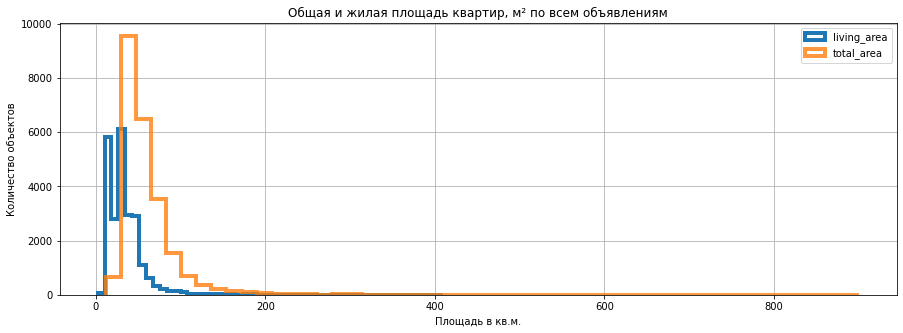

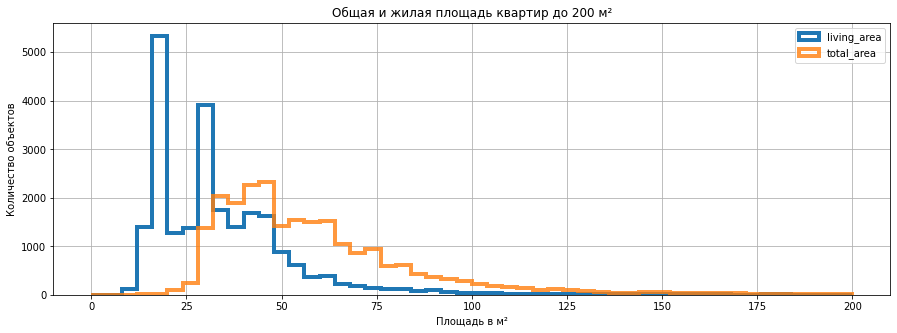

In [58]:
living_area_hist = df['living_area'].plot(
                kind = 'hist', 
                y = 'total_area', 
                histtype = 'step',
                bins = 50, 
                grid = True, 
                legend = True, 
                alpha = 1,
                linewidth = 4,
                figsize = (15,5)
                )
total_area_hist = df['total_area'].plot(
                kind = 'hist', 
                y = 'total_area', 
                histtype = 'step',
                bins = 50,
                grid = True, 
                legend = True,
                alpha = 0.8,
                title = 'Общая и жилая площадь квартир, м² по всем объявлениям',linewidth = 4, ax = living_area_hist
                 ).set(xlabel='Площадь в кв.м.', ylabel='Количество объектов')

plt.show()

living_area_hist = df['living_area'].plot(
                kind ='hist', 
                y ='total_area', 
                histtype = 'step',
                bins = 50,
                grid = True, 
                legend = True,
                alpha = 1,
                linewidth = 4,
                figsize = (15,5),
                range = (0, 200)
                )
total_area_hist = df['total_area'].plot(
                kind = 'hist', 
                y = 'total_area', 
                histtype = 'step',
                bins = 50,
                grid = True, 
                legend = True,
                alpha = 0.8,
                title = 'Общая и жилая площадь квартир до 200 м²',linewidth = 4, ax = living_area_hist, 
                range = (0, 200)
                 ).set(xlabel = 'Площадь в м²', ylabel = 'Количество объектов')

**Вывод:** На продажу выставлены квартиры общей площадью от 12 до 900 м² В основном это жилье общей площадью от 30 до 100 м² с пиком в сегменте 30-50 м² и вторым нпиком в сегменте 50-75 м².

В дальнейшем нам придётся **отсеять все квартиры с площадью больше 125 м².** Потому что их количество слишком маленькое и не выборки по ним не будут репрезентативными.

В жилой площади квартиры **преобладает диапазон 15-50 м². с пиком 20-30 м².**

In [59]:
# Избавляемся от квартир с "излишевствами", обновляем индекс
# Обновлённый датафрейм назовём df_good
df_good = df[df.total_area < 125].reset_index(drop = True)
display(df_good)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,locality_category,price_per_sq_meter,day_of_posting,monht_of_posting,year_of_posting,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,-1,Санкт-Петербург,120370,3,3,2019,Другой этаж,16
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,...,0,0,81,Посёлки,82920,1,12,2018,Первый этаж,18
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,...,2,574,558,Санкт-Петербург,92785,3,8,2015,Другой этаж,13
3,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,Санкт-Петербург,100000,1,6,2018,Другой этаж,8
4,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,False,...,0,0,55,Посёлки,95065,0,9,2018,Другой этаж,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22602,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,1,675,239,Города,73717,4,8,2016,Другой этаж,34
22603,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,0,0,45,Города,52542,0,1,2018,Другой этаж,0
22604,18,2500000,56.70,2018-02-11,2,2.60,3,29.70,1,False,...,0,0,-1,Сёла,44091,6,2,2018,Первый этаж,0
22605,13,11475000,76.75,2017-03-28,2,3.00,17,30.50,12,False,...,3,196,602,Санкт-Петербург,149511,1,3,2017,Другой этаж,10


#### Рассмотрим размеры площади кухни.

In [60]:
df[['kitchen_area']].describe()

,kitchen_area
count,23565.00
mean,10.44
std,5.64
min,1.30
25%,7.30
50%,9.00
75%,11.50
max,112.00


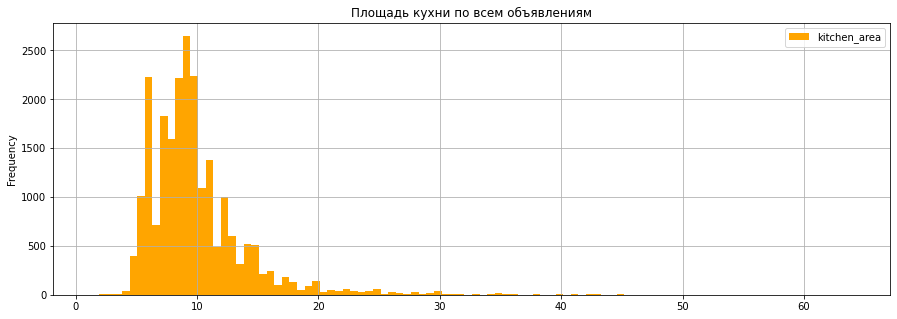

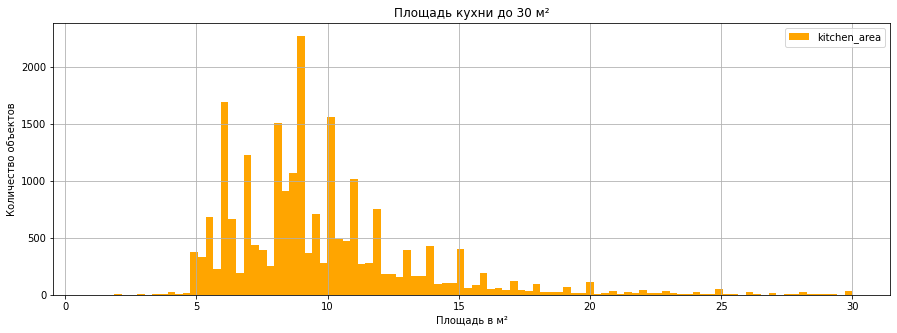

In [61]:
# Построим гистограмму по площади кухни 

kitchen_area_hist = df_good['kitchen_area'].plot(
                kind='hist', 
                y='kitchen_area', 
                histtype='bar',
                bins=100,grid=True, 
                legend=True,alpha=1,
                linewidth=4,
                figsize= (15,5),
                color = 'orange',
                title = 'Площадь кухни по всем объявлениям'
                )


plt.show()
# Построим гистограмму по площади кухни до 30 м²

kitchen_area_hist = df_good['kitchen_area'].plot(
                kind = 'hist', 
                y = 'kitchen_area', 
                histtype = 'bar',
                bins = 100,
                grid = True, 
                legend = True,
                alpha = 1,
                title = 'Площадь кухни до 30 м²',
                linewidth = 4, у
                range = (1, 30),
                figsize = (15,5),
                color = 'orange'
                 ).set(xlabel = 'Площадь в м²', ylabel = 'Количество объектов')

**Вывод:** На гистограммах мы можем увидеть, что диапазон площади кухни-в основном от 5 до 15 м², с пиком 8 м². Это стандартные небольшие квартиры, которые распространены в наших городах и являются типичными для среднестатистической квартиры эконом-класса.

Продолжим избавляться от редких значений. Выбросами будем считать кухни меньше 5 м² и больше 30 м².

In [62]:
df_good = df[df.kitchen_area < 30].reset_index(drop = True)
df_good = df[df.kitchen_area > 5].reset_index(drop = True)
display(df_good)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,locality_category,price_per_sq_meter,day_of_posting,monht_of_posting,year_of_posting,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,-1,Санкт-Петербург,120370,3,3,2019,Другой этаж,16
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,...,0,0,81,Посёлки,82920,1,12,2018,Первый этаж,18
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,...,2,574,558,Санкт-Петербург,92785,3,8,2015,Другой этаж,13
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,3,234,424,Санкт-Петербург,408176,4,7,2015,Другой этаж,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,Санкт-Петербург,100000,1,6,2018,Другой этаж,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23099,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381,-1,Санкт-Петербург,72490,1,3,2017,Другой этаж,4
23100,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,0,0,45,Города,52542,0,1,2018,Другой этаж,0
23101,18,2500000,56.70,2018-02-11,2,2.60,3,29.70,1,False,...,0,0,-1,Сёла,44091,6,2,2018,Первый этаж,0
23102,13,11475000,76.75,2017-03-28,2,3.00,17,30.50,12,False,...,3,196,602,Санкт-Петербург,149511,1,3,2017,Другой этаж,10


#### Рассмотрим цены объектов.

In [63]:
# Посмотрим основные данные по ценам в тыс.
(df_good['last_price']/1000).describe()

count    23104.00
mean      6604.33
std      11006.36
min        430.00
25%       3470.00
50%       4690.00
75%       6800.00
max     763000.00
Name: last_price, dtype: float64

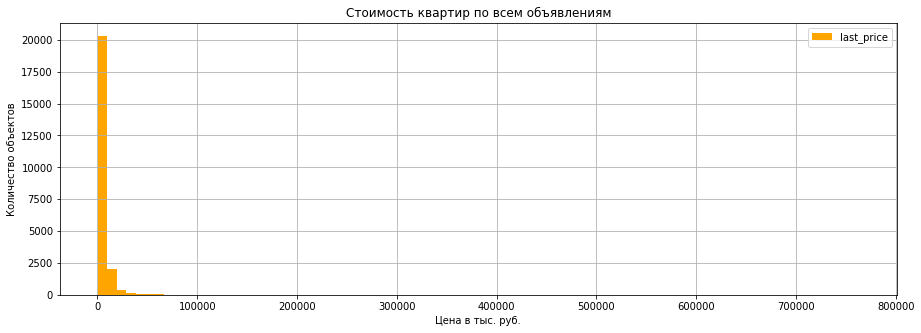

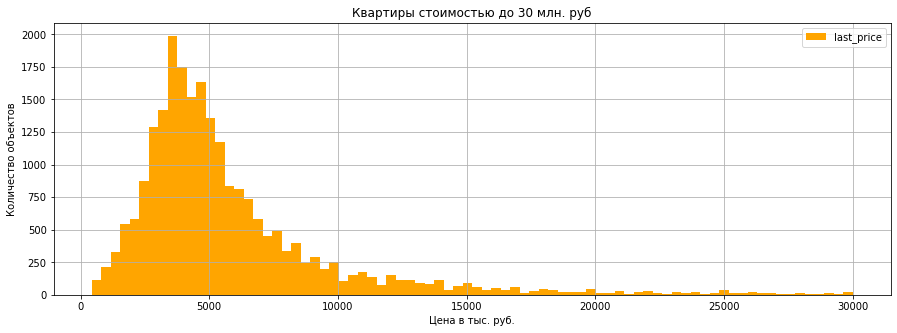

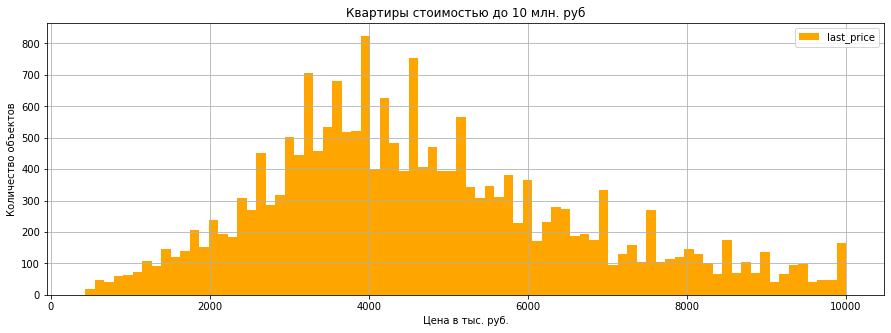

In [64]:
# Построим гистограмму по стоимости

last_price_hist = (df_good['last_price']/1000).plot(
                kind = 'hist', 
                y = df_good['last_price']/1000, 
                histtype = 'bar',
                bins = 80,
                grid = True, 
                legend = True,
                alpha = 1,
                linewidth = 4,
                figsize = (15,5),
                color = 'orange',
                title = 'Стоимость квартир по всем объявлениям'
                ).set(xlabel = 'Цена в тыс. руб.', ylabel = 'Количество объектов')


plt.show()
# Построим гистограмму по квартирам со стоимостью до 30 млн. рую

last_price_hist = (df_good['last_price']/1000).plot(
                kind = 'hist', 
                y = df_good['last_price']/1000, 
                histtype = 'bar',
                bins = 80,
                grid = True, 
                legend = True,
                alpha = 1,
                title = 'Квартиры стоимостью до 30 млн. руб',
                linewidth = 4, 
                figsize = (15,5),
                range = ((df_good['last_price']/1000).min(), 30000),
                color = 'orange'
                 ).set(xlabel = 'Цена в тыс. руб.', ylabel = 'Количество объектов')

plt.show()
# Построим гистограмму по квартирам со стоимостью до 10 млн. рую

last_price_hist = (df_good['last_price']/1000).plot(
                kind = 'hist', 
                y = df_good['last_price']/1000, 
                histtype = 'bar',
                bins = 80,
                grid = True, 
                legend = True,
                alpha = 1,
                title = 'Квартиры стоимостью до 10 млн. руб',linewidth=4, 
                figsize = (15,5),
                range = ((df_good['last_price']/1000).min(), 10000),
                color = 'orange'
                 ).set(xlabel = 'Цена в тыс. руб.', ylabel = 'Количество объектов')

**Вывод:** В нашей категории квартиры с ценой от 430 тыс. руб. до 763 млн. руб. Основная масса значений находится в диапазоне 2 -20 млн.руб. с пиком в области 3-4.5 млн.руб.(небольшие квартиры эконом-класса). Продолжим избавляться от редких значений. Выбросами будем считать квартиры стомостью больше 25 млн. руб.

In [65]:
df_good = df_good[df_good.last_price < 25000000].reset_index(drop = True)
display(df_good)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,locality_category,price_per_sq_meter,day_of_posting,monht_of_posting,year_of_posting,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,-1,Санкт-Петербург,120370,3,3,2019,Другой этаж,16
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,...,0,0,81,Посёлки,82920,1,12,2018,Первый этаж,18
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,...,2,574,558,Санкт-Петербург,92785,3,8,2015,Другой этаж,13
3,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,Санкт-Петербург,100000,1,6,2018,Другой этаж,8
4,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,False,...,0,0,55,Посёлки,95065,0,9,2018,Другой этаж,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22607,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381,-1,Санкт-Петербург,72490,1,3,2017,Другой этаж,4
22608,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,0,0,45,Города,52542,0,1,2018,Другой этаж,0
22609,18,2500000,56.70,2018-02-11,2,2.60,3,29.70,1,False,...,0,0,-1,Сёла,44091,6,2,2018,Первый этаж,0
22610,13,11475000,76.75,2017-03-28,2,3.00,17,30.50,12,False,...,3,196,602,Санкт-Петербург,149511,1,3,2017,Другой этаж,10


Построим распределение по стоимости за 1 м²

In [66]:
df_good['price_per_sq_meter'].describe()

count    22612.00
mean     95856.76
std      34062.41
min       7962.00
25%      76480.50
50%      94567.50
75%     112903.00
max     640422.00
Name: price_per_sq_meter, dtype: float64

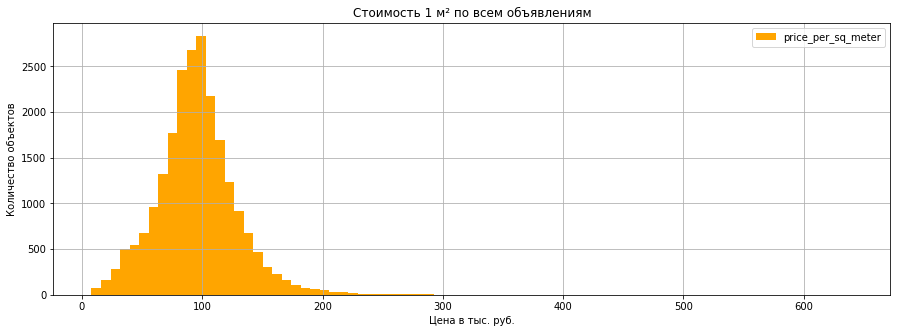

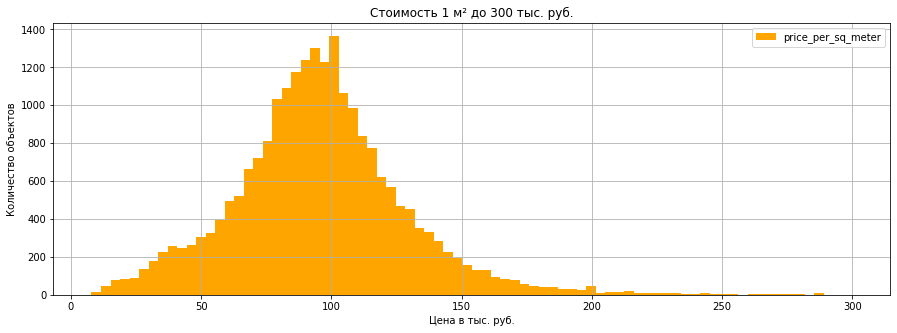

In [67]:
price_per_sq_meter_hist = (df_good['price_per_sq_meter']/1000).plot(
                kind = 'hist', 
                y = df_good['price_per_sq_meter']/1000, 
                histtype = 'bar',
                bins = 80,
                grid = True, 
                legend = True,
                alpha = 1,
                linewidth = 4,
                figsize = (15,5),
                color = 'orange',
                title = 'Стоимость 1 м² по всем объявлениям'
                ).set(xlabel = 'Цена в тыс. руб.', ylabel = 'Количество объектов')

plt.show()

price_per_sq_meter_hist = (df_good['price_per_sq_meter']/1000).plot(
                kind = 'hist', 
                y = df_good['price_per_sq_meter']/1000, 
                histtype = 'bar',
                bins = 80,
                grid = True, 
                legend = True,
                alpha = 1,
                linewidth = 4,
                figsize = (15,5),
                color = 'orange',
                range = ((df_good['price_per_sq_meter']/1000).min(), 300),
                title = 'Стоимость 1 м² до 300 тыс. руб.'
                ).set(xlabel = 'Цена в тыс. руб.', ylabel = 'Количество объектов')

**Вывод:** Стоимость квадратного метра имеет нормальное распределение с длинным хвостом от 205 до 640 тыс. руб. Основная масса предложений в диапазоне от 40 до 150 тыс. руб в с пиком в области от 80 до 105 тыс. Редкими являются значения от 250 тыс. руб. от них избавляемся.

In [68]:
df_good = df_good[df_good.price_per_sq_meter < 250000].reset_index(drop = True)
display(df_good)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,locality_category,price_per_sq_meter,day_of_posting,monht_of_posting,year_of_posting,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,-1,Санкт-Петербург,120370,3,3,2019,Другой этаж,16
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,...,0,0,81,Посёлки,82920,1,12,2018,Первый этаж,18
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,...,2,574,558,Санкт-Петербург,92785,3,8,2015,Другой этаж,13
3,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,Санкт-Петербург,100000,1,6,2018,Другой этаж,8
4,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,False,...,0,0,55,Посёлки,95065,0,9,2018,Другой этаж,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3,381,-1,Санкт-Петербург,72490,1,3,2017,Другой этаж,4
22552,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,0,0,45,Города,52542,0,1,2018,Другой этаж,0
22553,18,2500000,56.70,2018-02-11,2,2.60,3,29.70,1,False,...,0,0,-1,Сёла,44091,6,2,2018,Первый этаж,0
22554,13,11475000,76.75,2017-03-28,2,3.00,17,30.50,12,False,...,3,196,602,Санкт-Петербург,149511,1,3,2017,Другой этаж,10


#### Рассмотрим предложения в разрезе количества комнат.

In [69]:
df_good['rooms'].describe()

count   22556.00
mean        2.03
std         1.01
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        11.00
Name: rooms, dtype: float64

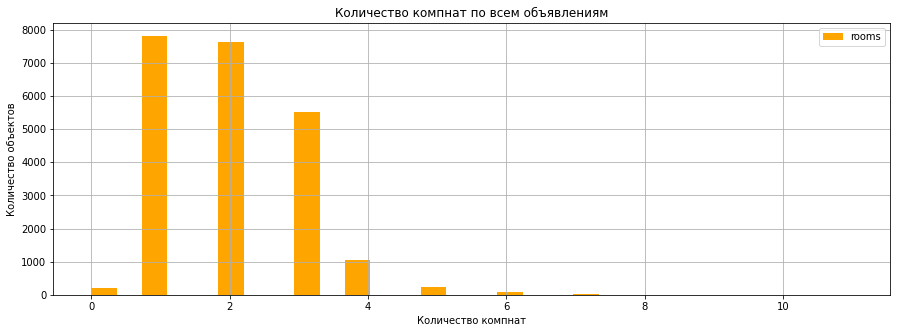

In [70]:

rooms_hist = df_good['rooms'].plot(
                kind='hist', 
                y=df_good['rooms'], 
                histtype='bar',
                bins=30,grid=True, 
                legend=True,alpha=1,
                linewidth=4,
                figsize= (15,5),
                color = 'orange',
                title = 'Количество компнат по всем объявлениям'
                ).set(xlabel='Количество компнат', ylabel='Количество объектов')

**Вывод:** По гистограмме видно, что основная масса объявлений имеет от 1 до 3 комнат. Квартир в которых больше 6 комнат практически не видно, убираем всё, что больше этого значения.



In [71]:
df_good = df_good[df_good.rooms < 7].reset_index(drop = True)
df_good['rooms'].describe()

count   22513.00
mean        2.02
std         0.98
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         6.00
Name: rooms, dtype: float64

#### Рассмотрим предложения в разрезе высоты потолков.

In [72]:
df_good['ceiling_height'].describe()

count   22513.00
mean        2.69
std         0.21
min         2.50
25%         2.60
50%         2.64
75%         2.70
max         5.00
Name: ceiling_height, dtype: float64

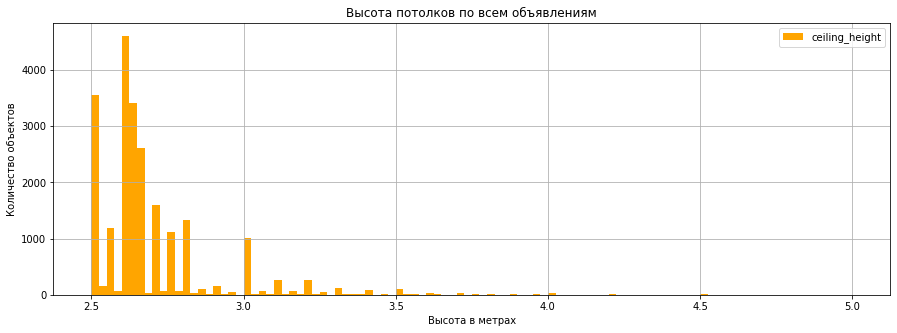

In [73]:
ceiling_height_hist = df_good['ceiling_height'].plot(
                kind='hist', 
                y=df_good['rooms'], 
                histtype='bar',
                bins=100,grid=True, 
                legend=True,alpha=1,
                linewidth=4,
                figsize= (15,5),
                color = 'orange',
                title = 'Высота потолков по всем объявлениям'
                ).set(xlabel='Высота в метрах', ylabel='Количество объектов')

**Вывод:** Основная масса квартир имеет высоту потолков  от 2.5 до 3.5м с существенным пиком в высоте 2.5-2.7 м. Общий диапазон от 2.5 до 5 метров, небольшое количество обьявлений в диапазоне от 3 до 5 метров, в данном случае мы не будем обрезать наш датафрейм. 


#### Рассмотрим предложения в разрезе нахожде этаже.


In [74]:
df_good['floor'].describe()

count   22513.00
mean        5.93
std         4.91
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

Построим гистограмму соотношения этажей и общего количества объявлений.

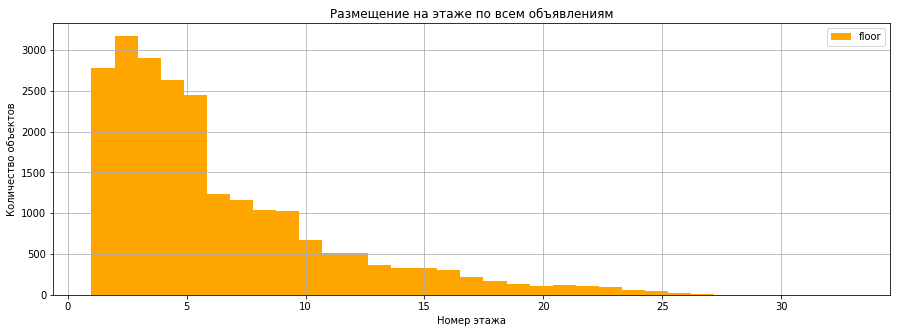

In [75]:
floor_hist = df_good['floor'].plot(
                kind = 'hist', 
                y = df_good['floor'], 
                histtype = 'bar',
                bins = 33,
                grid = True, 
                legend = True,
                alpha = 1,
                linewidth = 4,
                figsize = (15,5),
                color = 'orange',
                title = 'Размещение на этаже по всем объявлениям'
                ).set(xlabel='Номер этажа', ylabel ='Количество объектов')


**Вывод:** Основная доля продающихся квартир находится в диапазоне от 1 до 5 этажа с пиком на втором этаже. Сделующий по "весу" блок идёт с 6 до 10го этажа. 

#### Рассмотрим предложения по типу этажа (первый, последний, другой).

In [76]:
df_good['floor_category'].value_counts()

Другой этаж       16654
Последний этаж     3085
Первый этаж        2774
Name: floor_category, dtype: int64

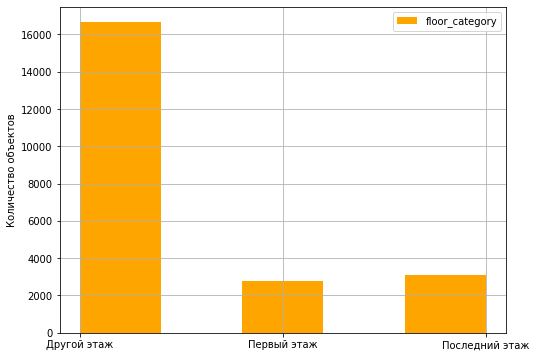

In [77]:
df_good['floor_category'].hist(bins = 5, 
                               grid = True,
                               legend = True,
                               figsize = (8,6),
                               color = 'orange').set(ylabel ='Количество объектов')
plt.show()

**Вывод:** Данное распределение является нормальным, две крайние категории расположились между всеми остальными этажами.

#### Рассмотрим общее количество этажей в доме.

In [78]:
df_good['floors_total'].describe()

count   22513.00
mean       10.84
std         6.63
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

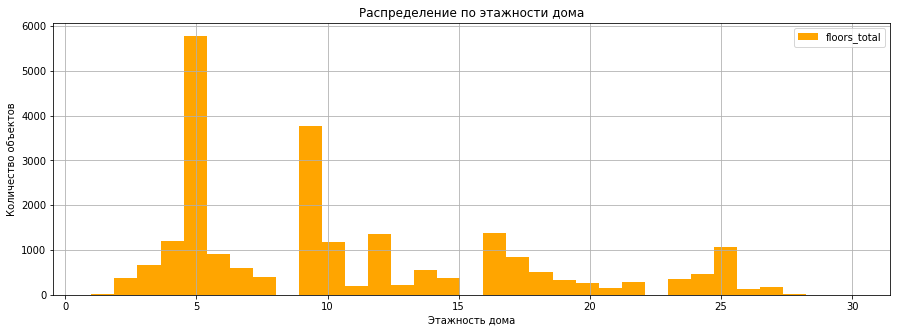

In [79]:
floors_total_hist = df['floors_total'].plot(
                kind = 'hist', 
                y = 'floors_total', 
                histtype = 'bar',
                bins = 33,
                grid = True, 
                legend = True,
                range = (1, 30),
                figsize = (15,5),
                color = 'orange',
                title = 'Распределение по этажности дома'
                 ).set(xlabel = 'Этажность дома', ylabel = 'Количество объектов')

**Вывод:** По этой диаграмме четко видим моду на пятиэтажные и девятиэтажные дома. Так же интересно выглядят пики на отметке 11 и 16 этажей.

#### Рассмотрим объекты по удалённости от центра города.

In [80]:
df_good['city_centers_nearest'].describe()

count   22513.00
mean    11010.82
std      9572.85
min         0.00
25%      2357.00
50%     11532.00
75%     15359.00
max     65968.00
Name: city_centers_nearest, dtype: float64

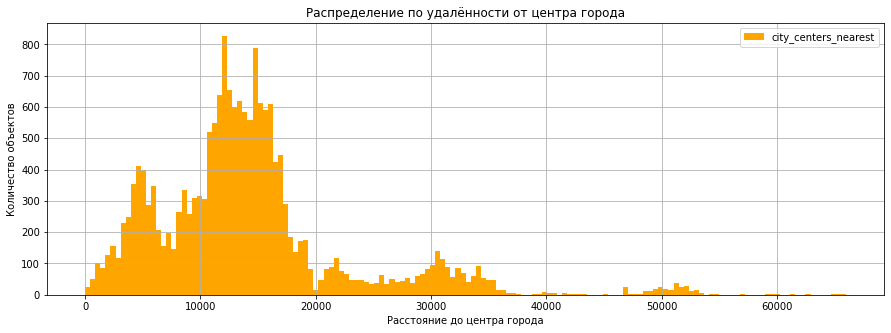

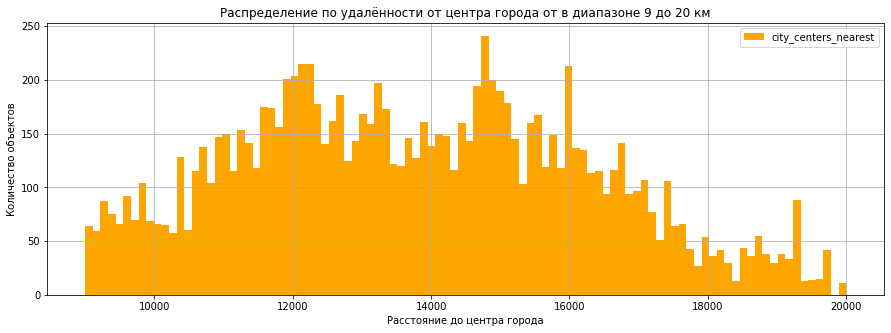

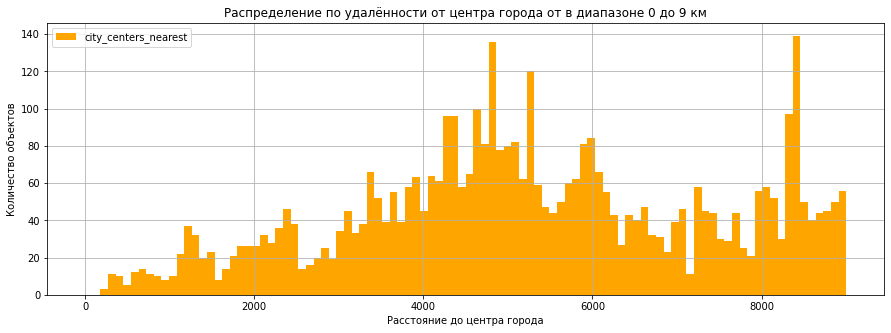

In [81]:
city_centers_nearest_hist = df['city_centers_nearest'].plot(
                kind = 'hist', 
                y = 'city_centers_nearest', 
                histtype = 'bar',
                bins = 150,
                grid = True, 
                legend = True,
                range = (1, 65968),
                figsize = (15,5),
                color = 'orange',
                title = 'Распределение по удалённости от центра города'
                 ).set(xlabel = 'Расстояние до центра города', ylabel = 'Количество объектов')

plt.show()

city_centers_nearest_hist = df['city_centers_nearest'].plot(
                kind = 'hist', 
                y = 'city_centers_nearest', 
                histtype = 'bar',
                bins = 100,
                grid = True, 
                legend = True,
                range = (9000, 20000),
                figsize= (15,5),
                color = 'orange',
                title='Распределение по удалённости от центра города от в диапазоне 9 до 20 км'
                 ).set(xlabel='Расстояние до центра города', ylabel='Количество объектов')

plt.show()

city_centers_nearest_hist = df['city_centers_nearest'].plot(
                kind = 'hist', 
                y = 'city_centers_nearest', 
                histtype = 'bar',
                bins = 100,
                grid = True, 
                legend = True,
                range = (1, 9000),
                figsize= (15,5),
                color = 'orange',
                title = 'Распределение по удалённости от центра города от в диапазоне 0 до 9 км'
                 ).set(xlabel = 'Расстояние до центра города', ylabel = 'Количество объектов')

**Вывод:** На этих гистограммах видно, что на рынке преобладают квартиры которые находятся в диапазоне от 9 до 20км от центра. Следующая по величине группа находится в "центре города", меньше всего квартир продается за четрой 20км от центра, что вполне естесвенно, там плотность застройки ниже.

#### Расстояние до ближайшего аэропорта.

In [82]:
df_good['airports_nearest'].describe()

count   22513.00
mean    22050.47
std     16571.93
min         0.00
25%     10010.00
50%     21651.00
75%     34676.00
max     84869.00
Name: airports_nearest, dtype: float64

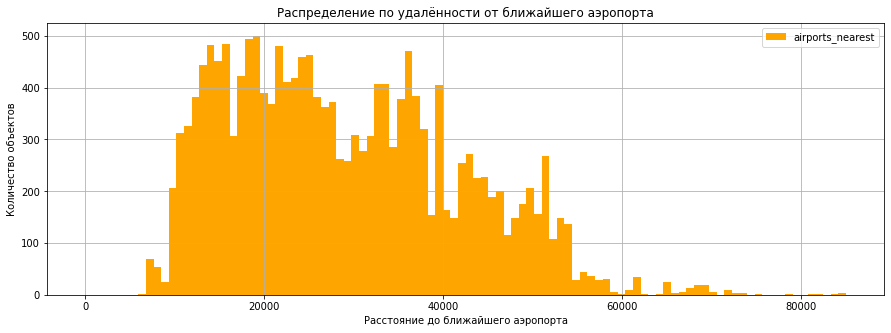

In [83]:
airports_nearest_hist = df_good['airports_nearest'].plot(
                kind = 'hist', 
                y = 'airports_nearest', 
                histtype = 'bar',
                bins = 100,
                grid = True, 
                legend = True,
                figsize = (15,5),
                range = (1, 85000),
                color = 'orange',
                title = 'Распределение по удалённости от ближайшего аэропорта'
                 ).set(xlabel='Расстояние до ближайшего аэропорта', ylabel = 'Количество объектов')

**Вывод:** Глядя на диаграмму выделяется группа квартир которые находятся в диапазоне  от 9 до 25км по удалённости от ближайшего аэропорта, с пиками оп всему диапазону.

#### Расстояние до ближайшего парка.

In [84]:
df_good['parks_nearest'].describe()

count   22513.00
mean     2243.63
std      1249.59
min         1.00
25%       619.00
50%      3114.00
75%      3114.00
max      3190.00
Name: parks_nearest, dtype: float64

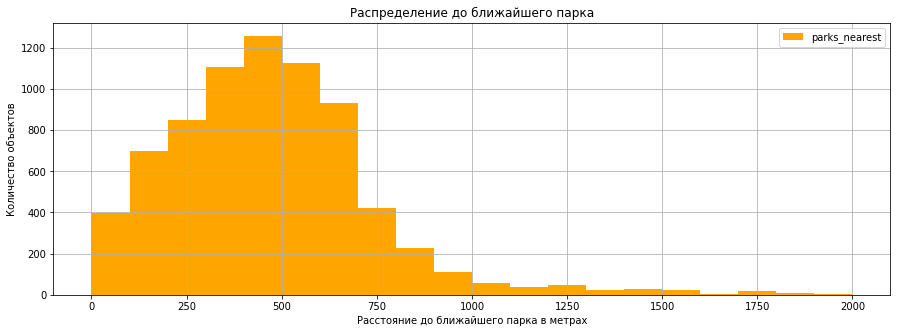

In [85]:
parks_nearest_hist = df_good['parks_nearest'].plot(
                kind = 'hist', 
                y = 'parks_nearest', 
                histtype = 'bar',
                bins = 20,
                grid = True, 
                legend = True,
                figsize = (15,5),
                range = (0, 2000),
                color = 'orange',
                title = 'Распределение до ближайшего парка'
                 ).set(xlabel='Расстояние до ближайшего парка в метрах', ylabel = 'Количество объектов')




**Вывод:** В Санкт-Петербурге и области очень много парковых зон, для большенства квартир парк находится в зоне до 1км.

#### Рассмотрим распределение обьявлений по дню недели, месяцу, году.

In [86]:
df_good['day_of_posting'].describe()

count   22513.00
mean        2.57
std         1.79
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: day_of_posting, dtype: float64

In [87]:
df_good['monht_of_posting'].describe()

count   22513.00
mean        6.40
std         3.49
min         1.00
25%         3.00
50%         6.00
75%        10.00
max        12.00
Name: monht_of_posting, dtype: float64

In [88]:
df_good['year_of_posting'].describe()

count   22513.00
mean     2017.38
std         1.03
min      2014.00
25%      2017.00
50%      2017.00
75%      2018.00
max      2019.00
Name: year_of_posting, dtype: float64

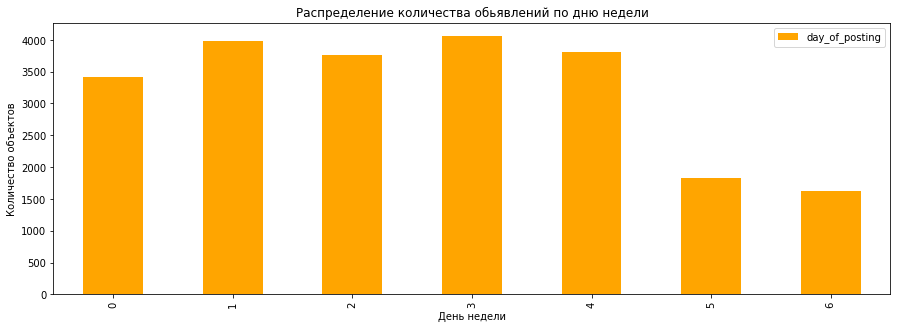

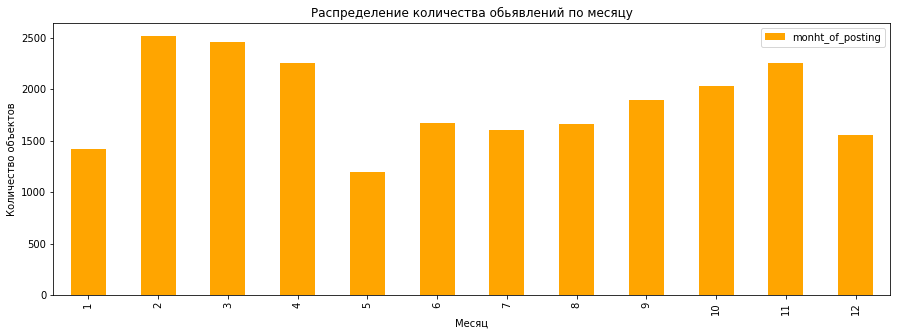

[Text(0.5, 0, 'Год'), Text(0, 0.5, 'Количество объектов')]

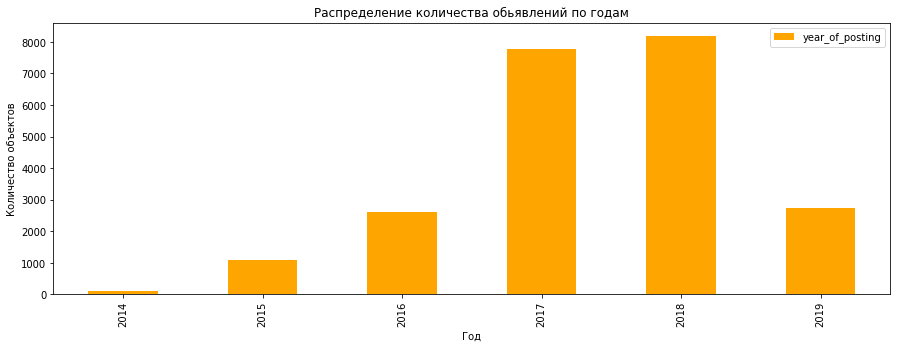

In [89]:
df_good['day_of_posting'].value_counts().sort_index(ascending=True).plot(
                kind = 'bar', 
                y = 'day_of_posting', 
                legend = True,
                figsize = (15,5),
                color = 'orange',
                title = 'Распределение количества обьявлений по дню недели'
                ).set(xlabel='День недели', ylabel = 'Количество объектов')

plt.show()

df_good['monht_of_posting'].value_counts().sort_index(ascending=True).plot(
                kind = 'bar', 
                y = 'monht_of_posting', 
                legend = True,
                figsize = (15,5),
                color = 'orange',
                title = 'Распределение количества обьявлений по месяцу'
                 ).set(xlabel='Месяц', ylabel = 'Количество объектов')


plt.show()

df_good['year_of_posting'].value_counts().sort_index(ascending=True).plot(
                kind = 'bar', 
                y = 'year_of_posting', 
                legend = True,
                figsize = (15,5),
                color = 'orange',
                title = 'Распределение количества обьявлений по годам'
                 ).set(xlabel='Год', ylabel = 'Количество объектов')

**Вывод:** Диаграмма распределения по дню неделю явно показывает, что активнее всего объявления выкладываются по будням, пиковые дни вторник и четверг. Диаграмма распределния по месяцам показывает что на рынке недвижимости присутвует сезонная активность. Самые активные месяцы - февраль, март, ноябрь. С июля по Ноябрь активность растёт. Менее активными месяцами оказались январь, май и декабрь. Диаграмма активности от года к году показывает позитивную динамику с 2014 по 2018 год, самый активный рост произошел в 2017 году. 2019 год выгружен лишь до мая месяца, поэтому в этой колонке мы наблюдаем спад. 


#### Изучим скорость продажи объекта.

In [90]:
df_good['days_exposition'].describe()

count   22513.00
mean      154.68
std       210.87
min        -1.00
25%        23.00
50%        73.00
75%       196.00
max      1580.00
Name: days_exposition, dtype: float64

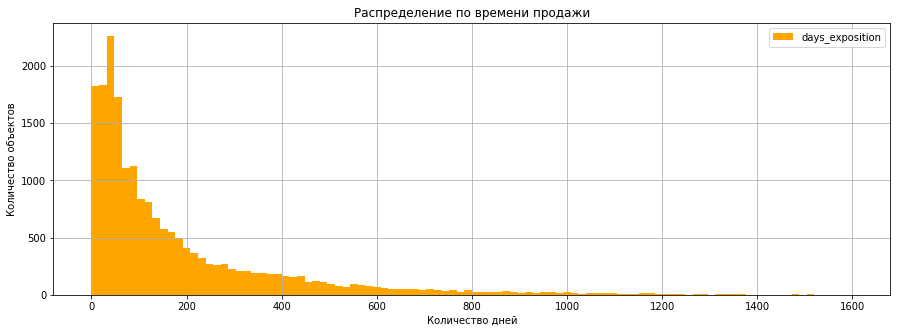

Среднее время продажи: 154 дня

Медианное значение времени продажи: 73 дня


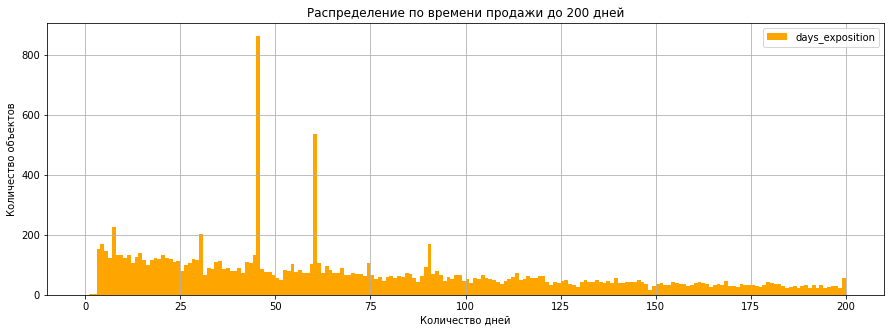

In [91]:
days_exposition_hist = df_good['days_exposition'].plot(
                kind = 'hist', 
                y = 'days_exposition', 
                histtype = 'bar',
                bins = 100,
                grid = True, 
                legend = True,
                figsize = (15,5),
                range = (0, 1600),
                color = 'orange',
                title = 'Распределение по времени продажи'
                 ).set(xlabel='Количество дней', ylabel = 'Количество объектов')

plt.show()

days_exposition_hist = df_good['days_exposition'].plot(
                kind = 'hist', 
                y = 'days_exposition', 
                histtype = 'bar',
                bins = 200,
                grid = True, 
                legend = True,
                figsize = (15,5),
                range = (0, 200),
                color = 'orange',
                title = 'Распределение по времени продажи до 200 дней'
                 ).set(xlabel='Количество дней', ylabel = 'Количество объектов')

print('Среднее время продажи:', df_good['days_exposition'].mean().astype(int).round(0), 'дня')
print()
print('Медианное значение времени продажи:', df_good['days_exposition'].median().astype(int).round(0), 'дня')


**Вывод:** Максимальное  время продажи - до 1580 дней. При этом можно увидеть, что большинство квартир продается в первые 20-100 дней с момента публикации. Среднее время продажи составляет 154 дня, медианное значение времени продажи 73 дня. Рассмотрев эту часть подробнее видим аномалии, на 45й и 60й день квартира продаётся на несколько порядков больше чем в другие дни.
Быстрой продажей можно считать сделку до 50 дней. Долгой продажей можно считать сделку превышающей среднее значение в 154 дня. 

#### Вывод по разделу 4:

На рынке жилья представлены объекты с площадью от 12 до 900 квадратных метров, но наиболее распространены квартиры общей площадью от 30 до 100 квадратных метров, с основным пиком в сегменте 30-50 м² и вторым нпиком в сегменте 50-75 м². В жилой площади квартиры преобладает диапазон 15-50 м². с пиком 20-30 м². Кухни в квартирах имеют размер от 5 до 15 м², с пиком в 8 квадратных метров. Эти типичные небольшие квартиры являются стандартом для среднестатистической квартиры эконом-класса в городах. Большинство квартир на рынке имеют 1-3 комнаты с высотой потолка от 2,5 до 2,7 метров. Так же существуют и редкие варианты с огромным количеством компнат (до 19) и потолками от 3,5 до 6 метров. 



Цены на квартиры в основном находится в диапазоне от  2 до 20 млн.руб. с пиком в области 3-4.5 млн.руб.(небольшие квартиры эконом-класса). но есть и уникальные объекты стоимостью до 763 млн.руб. Стоимость квадратного метра имеет нормальное распределение с длинным хвостом от 205 до 640 тыс. руб. Основная масса предложений в диапазоне от 40 до 150 тыс. руб в с пиком в области от 80 до 105 тыс. руб.




Общее время продажи жилой недвижимости-до 1618 дней. Половина квартир продается за период до 94 дней, а среднее значение по всему массиву данных -185 дней. При этом можно увидеть, что пик продаж приходится на 60 день с момента публикации. Исходя из расчета выбросов можно сказать, что продажи прошли аномально быстро, если сделки были оформлены в период до 16 дней и слишком долго, если до оформления сделки свыше 1134 дней.

### Изучим факторы которые больше всего влияют на общую (полную) стоимость объекта.

In [92]:
# Построим сводную таблицу корреляции

df_good[['last_price', 'total_area','living_area', 
         'kitchen_area', 'rooms', 'floor' , 
         'day_of_posting', 'monht_of_posting', 'year_of_posting']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,floor,day_of_posting,monht_of_posting,year_of_posting
last_price,1.00,0.79,0.66,0.57,0.52,0.08,-0.02,-0.00,-0.03
total_area,0.79,1.00,0.91,0.53,0.79,-0.03,-0.01,0.00,-0.08
living_area,0.66,0.91,1.00,0.31,0.88,-0.12,-0.01,-0.01,-0.06
kitchen_area,0.57,0.53,0.31,1.00,0.19,0.15,-0.01,0.01,-0.05
rooms,0.52,0.79,0.88,0.19,1.00,-0.16,-0.00,-0.01,-0.05
floor,0.08,-0.03,-0.12,0.15,-0.16,1.00,0.01,0.02,0.00
day_of_posting,-0.02,-0.01,-0.01,-0.01,-0.00,0.01,1.00,0.01,-0.00
monht_of_posting,-0.00,0.00,-0.01,0.01,-0.01,0.02,0.01,1.00,-0.27
year_of_posting,-0.03,-0.08,-0.06,-0.05,-0.05,0.00,-0.00,-0.27,1.00


Из таблицы корреляции сразу видно что в на полную стоимость влияют только 4 фактора из 8.

Перечислим по убыванию факторы которые имеют влияние:
- `total_area` - общая плоащадь (к.к. = 0.79)
- `living_area` - жилая площадь (к.к. = 0.66)
- `kitchen_area` - площадь кухни (к.к. = 0.57)
- `rooms` - количество комнат (к.к. = 0.52)
- `floor` - этаж (очень слабая корреляция 0.08)


Для подробного анализа воспользуемся средствами визуализации и проверим все факторы.





#### Зависит ли цена от общей площади.

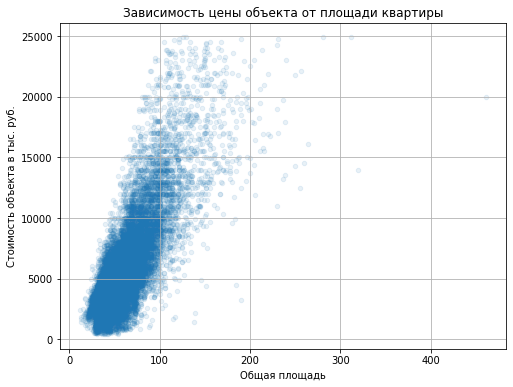

In [93]:
df_good['last_price'] = df_good['last_price'] / 1000

df_good.plot(x='total_area', 
             y = 'last_price', 
             kind = 'scatter', 
             alpha = 0.1,
             grid = True,
             figsize = (8,6),
             title = 'Зависимость цены объекта от площади квартиры'
             ).set(xlabel='Общая площадь', ylabel='Стоимость объекта в тыс. руб.');


#kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False,

**Вывод:** 

Из этой диаграммы так же видно, что есть корреляция между ценой и площадью. Она находится в дапазоне от 3 до 8 млн руб, и от 20 до 80м². После отметки 80м² мы видим очень слабое влияние площади на стоимость. 

#### Зависит ли цена от жилой площади.

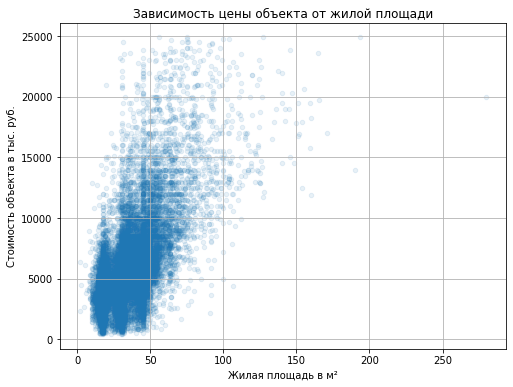

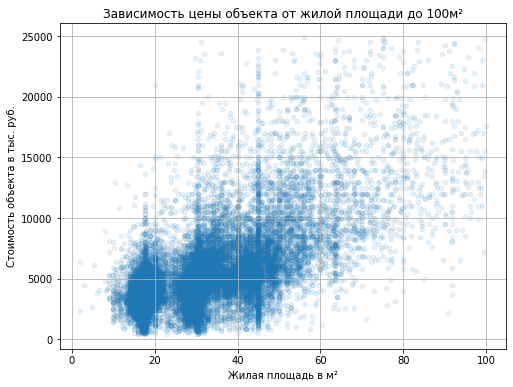

In [94]:
df_good.plot(x='living_area', 
             y = 'last_price', 
             kind = 'scatter', 
             alpha = 0.1,
             grid = True,
             figsize = (8,6),
             title = 'Зависимость цены объекта от жилой площади'
             ).set(xlabel='Жилая площадь в м²', ylabel='Стоимость объекта в тыс. руб.');

df_good.query('living_area < 100').plot(x='living_area', 
             y = 'last_price', 
             kind = 'scatter', 
             alpha = 0.1,
             grid = True,
             figsize = (8,6),
             title = 'Зависимость цены объекта от жилой площади до 100м²'
             ).set(xlabel='Жилая площадь в м²', ylabel='Стоимость объекта в тыс. руб.');

**Вывод:** 

Зависимость цены и жилой площади прослеживается в диапазонах во всех диапазонах(пики), вероятнее всего это связано с расположением объекта. 

#### Зависит ли цена от  площади кухни.

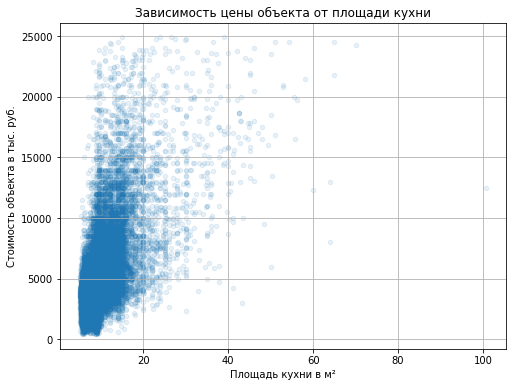

In [95]:
df_good.plot(x='kitchen_area', 
             y = 'last_price', 
             kind = 'scatter', 
             alpha = 0.1,
             grid = True,
             figsize = (8,6),
             title = 'Зависимость цены объекта от площади кухни'
             ).set(xlabel='Площадь кухни в м²', ylabel='Стоимость объекта в тыс. руб.');


**Вывод:** 

Прослеживается слабая корреляция между стоимостью объекта и площадью кухни. С другой стороны, интереснен тот факт, что квартира с площадью кухни до 30м² может стоить как и 5 млн руб. так и 25 млн. руб.

#### Зависит ли цена  от количества комнат. 

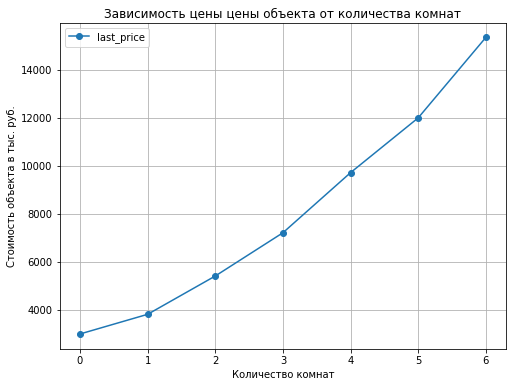

In [96]:
# Сгруппируем датафрейм по количеству комнат и посмотрим медианное значение стоимости объекта
df_good.pivot_table(index = 'rooms', 
                    values = 'last_price', 
                    aggfunc = 'mean'
                    ).reset_index().plot(
                    x = 'rooms', 
                    y = 'last_price',
                    figsize = (8,6),
                    grid = True, style = 'o-').set(
                    title = 'Зависимость цены цены объекта от количества комнат', 
                    xlabel = 'Количество комнат', ylabel = 'Стоимость объекта в тыс. руб.');

**Вывод:**

Зависимость безусловно присутвует. За каждую дополнительную комнату в среднем надо добавить 1,5 - 2 млн. руб. 

####  Зависит ли цена от типа этажа квартиры.

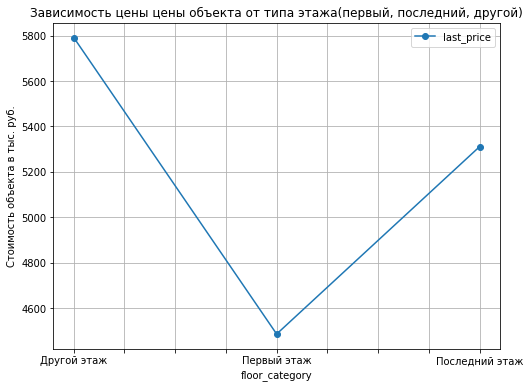

In [97]:
df_good.pivot_table(index = 'floor_category', 
                    values = 'last_price', 
                    aggfunc = 'mean'
                    ).reset_index().plot(
                    x = 'floor_category', 
                    y = 'last_price',
                    figsize = (8,6),
                    grid = True, style = 'o-').set(
                    title = 'Зависимость цены цены объекта от типа этажа(первый, последний, другой)', 
                    ylabel = 'Стоимость объекта в тыс. руб.');

**Вывод:**

Да, цена квартиры квартиры зависит от типа этажа, средняя стоимость кваритры на первом этаже дешевле на 1,2 млн руб чем на любом другом. Не так сильно теряет в цене квартира находящаяся на последнем этаже, в среднем они дешевле на 500 тыс. руб.

#### Зависит ли цена от даты размещения  (день, месяц, год).

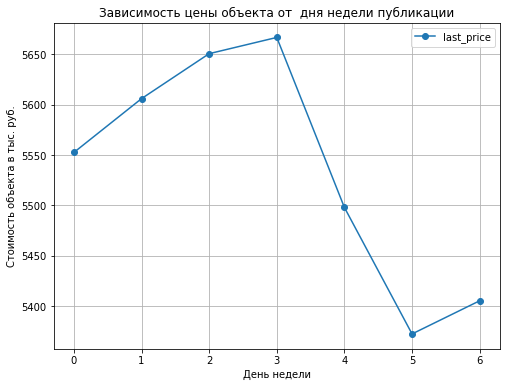

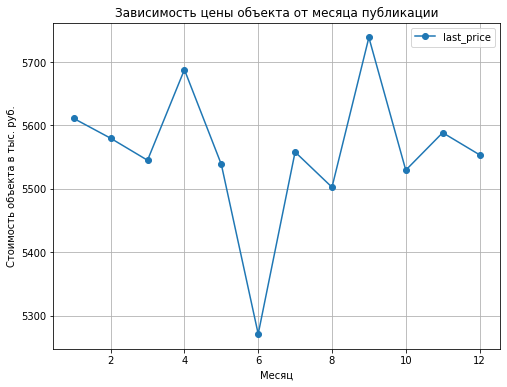

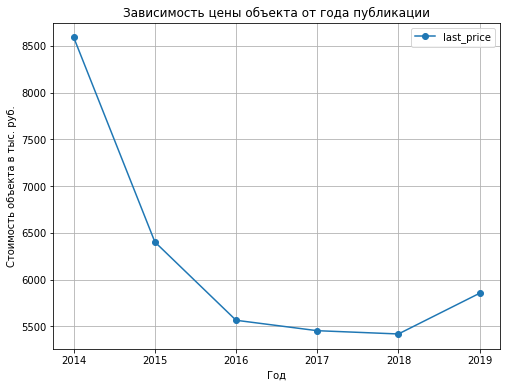

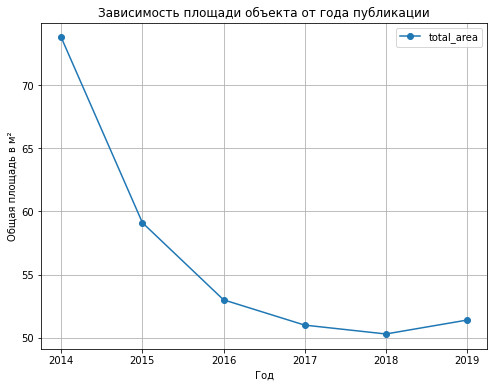

In [98]:
df_good.pivot_table(index = 'day_of_posting', 
                    values = 'last_price', 
                    aggfunc = 'mean'
                    ).reset_index().plot(
                    x = 'day_of_posting', 
                    y = 'last_price',
                    figsize = (8,6),
                    grid = True, style = 'o-').set(
                    title = 'Зависимость цены объекта от  дня недели публикации',
                    xlabel = 'День недели',
                    ylabel = 'Стоимость объекта в тыс. руб.');


df_good.pivot_table(index = 'monht_of_posting', 
                    values = 'last_price', 
                    aggfunc = 'mean'
                    ).reset_index().plot(
                    x = 'monht_of_posting', 
                    y = 'last_price',
                    figsize = (8,6),
                    grid = True, style = 'o-').set(
                    title = 'Зависимость цены объекта от месяца публикации',
                    xlabel = 'Месяц',
                    ylabel = 'Стоимость объекта в тыс. руб.');

df_good.pivot_table(index = 'year_of_posting', 
                    values = 'last_price', 
                    aggfunc = 'mean'
                    ).reset_index().plot(
                    x = 'year_of_posting', 
                    y = 'last_price',
                    figsize = (8,6),
                    grid = True, style = 'o-').set(
                    title = 'Зависимость цены объекта от года публикации',
                    xlabel = 'Год',
                    ylabel = 'Стоимость объекта в тыс. руб.');

df_good.pivot_table(index = 'year_of_posting', 
                    values = 'total_area', 
                    aggfunc = 'median'
                    ).reset_index().plot(
                    x = 'year_of_posting', 
                    y = 'total_area',
                    figsize = (8,6),
                    grid = True, style = 'o-').set(
                    title = 'Зависимость площади объекта от года публикации',
                    xlabel = 'Год',
                    ylabel = 'Общая площадь в м²');


**Вывод:** 

Взаимосвязь цены по всем трём признакам небольшая, тем не менее взаимосвязи вышли интересными.
- С понедельника по четверг средняя цена публикуемого объекта вырастает с 5.5 млн до 5,65 млн руб. Но затем средняя цена падает до субботы, с 5.65 млн до 5.35 млн. В воскресенье поднимается на 50 тыс. руб. 
- Интересный паттерн нарисовался в зависимости от месяца публикации. Самые дорогие кваритры выставляются в сентябре, самые дешовые в июне. Амплитуда между пиковыми значениями составляет 500 тыс. руб. 
- Обьяснить падение средцей стоимости жилья с 2014 по 2018 год нам помогает последняя диаграмма, среднее значение общей площади квартир за тот же период отражает аналогичную динамику.

#### Выводы по разделу 5. 

Есть корреляция между ценой и площадью. Она находится в дапазоне от 3 до 8 млн руб, и от 20 до 80м². После отметки 80м² мы видим очень слабое влияние площади на стоимость. Зависимость цены и жилой площади прослеживается в только в узких диапазонах, вероятнее всего это связано с расположением объекта. Корреляция между площадью кухни и ценой практически отсутвует. С другой стороны, интереснен тот факт, что квартира с площадью кухни до 30м² может стоить как и 5 млн. руб. так и 25 млн. руб. Есть зависимость между количеством комнат и стоимостью квартиры, за каждую дополнительную комнату в среднем надо добавить 1,5 - 2 млн. руб. Так же цена квартиры квартиры зависит от типа этажа, средняя стоимость кваритры на первом этаже дешевле на 1,2 млн руб чем на любом другом. Не так сильно теряет в цене квартира находящаяся на последнем этаже, в среднем они дешевле на 500 тыс. руб. Мы нашли интересные взаимосвязи касаемо дня недели и месяца публикации объекта. С понедельника по четверг средняя цена публикуемого объекта вырастает с 5.5 млн до 5,65 млн руб. Но затем средняя цена падает до субботы, с 5.65 млн до 5.35 млн. В воскресенье поднимается на 50 тыс. руб. Кваритры которые выставляются в сентябре в среднем дороже на 500 тыс. руб чем те что выставляют в июне. в среднем амплитуда по от месяца к месяцу составляет 100-150 т.р.



### Выборка 10 населённых пунктов с наибольшим числом объявлений.


In [99]:
top_10 = df_good['locality_name'].value_counts().head(10)
top_10 = top_10.reset_index().rename(columns = {'locality_name':'mean','index':'locality_name'})
top_10.head(10)

,locality_name,mean
0,Санкт-Петербург,14884
1,поселок Мурино,544
2,поселок Шушары,432
3,Всеволожск,394
4,Пушкин,334
5,Колпино,328
6,поселок Парголово,325
7,деревня Кудрово,298
8,Гатчина,280
9,Выборг,224


In [100]:
# Список для сохранения значений средней стоимости 1 кв.м.
top_mean = []  

# Цикл для расчета средних значений стоимости 1 кв.м. городов-топ и добавления значений в список top_mean :

for name in top_10['locality_name']:
    top_mean.append(round(df_good.query('locality_name == @name')['price_per_sq_meter'].mean()))
    
# Значения списка top_mean внесем в столбец mean датафрейма top_10
top_10['mean'] = top_mean
display(top_10.head(10))

,locality_name,mean
0,Санкт-Петербург,108978
1,поселок Мурино,85474
2,поселок Шушары,78646
3,Всеволожск,67252
4,Пушкин,102925
5,Колпино,75397
6,поселок Парголово,90236
7,деревня Кудрово,92435
8,Гатчина,69193
9,Выборг,58249


Теперь найдем города с максимальной и минимальной стоимостью 1 кв.м.

In [101]:
top_10.query('mean == mean.min() or mean == mean.max()')

,locality_name,mean
0,Санкт-Петербург,108978
9,Выборг,58249


**Вывод:**

- Город с максимальной средней стоимостью квадратного метра жилья - Санкт-Петербург (109 тыс.за кв.м.), 
- Город с минимальной средней стоимостью квадратного метра жилья - Выборг (58 тыс.за кв.м.)



In [102]:
df_good.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,14884,5450.00
поселок Мурино,544,3400.00
поселок Шушары,432,3990.00
Всеволожск,394,3465.00
Пушкин,334,5299.50
Колпино,328,3650.00
поселок Парголово,325,4100.00
деревня Кудрово,298,3790.00
Гатчина,280,3200.00


### Влияние местонахождения квартиры на цену.

In [103]:
locality_spb = df_good.query('locality_name == "Санкт-Петербург"')

locality_spb_pivot = locality_spb.pivot_table(index='city_centers_nearest_km', 
                                              values='last_price', aggfunc='mean').reset_index()

locality_spb_pivot



,city_centers_nearest_km,last_price
0,0,10666.82
1,1,10418.90
2,2,10176.91
3,3,9268.59
4,4,10199.44
5,5,9290.85
6,6,8619.22
7,7,8211.76
8,8,7818.13
9,9,6237.23


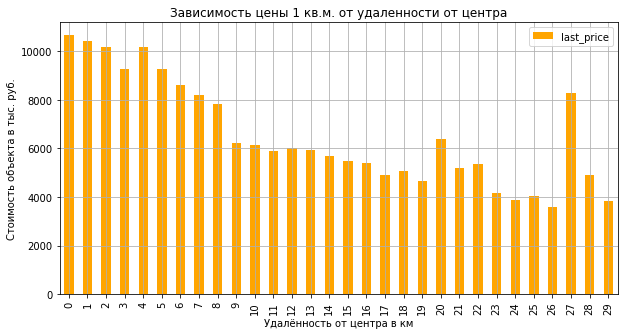

In [104]:
# Для наглядности построим столбчатую гистограмму

locality_spb_pivot.plot(x = 'city_centers_nearest_km', 
                        y = 'last_price', kind= 'bar', 
                        grid = True,
                        color = 'orange',
                        figsize = (10,5),
                        title = 'Зависимость цены 1 кв.м. от удаленности от центра').set(
                        xlabel = 'Удалённость от центра в км', ylabel='Стоимость объекта в тыс. руб.');

**Вывод:**

В нашем распоряжении - радиус в 29 км относительно центра и средняя цена объекта. По диаграмме видно, что ближе к центру средняя цена квартиры составляет от 8 до 10.5 млн. руб. стоимость начинает меняться в сторону уменьшения с 9 км. Таким образом,можно сказать, что центральная зона находится в радиусе до 8 км от центра.

Также на диаграмме виден выброс средней цены в районе 27 км, связанный с тем, что в этой позиции-единственный (и дорогой) объект недвижимости.

### Общий вывод

Представленные для анализа данные содержали данные о конкретной квартире, выставленной на продажу. По каждой квартире доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

В процессе предварительной обработки данных были выявлены явные и неявные пропуски, ошибки представления значений (значения, не соответствующие действительности). Скорее всего, данные взяты из разных источников, что является результатом пропусков значений в некоторых столбцах, а также предположительны ошибки при выгрузке и из-за некорректного заполнения первоисточников клиентом. Указанные проблемы были устранены.

Для дальнейшего анализа рассчитаны и добавлены отдельными столбцами значения цены 1 кв.м., дня недели, месяца и года объявления, категории этажа, категории населённого пункта, расстояние до центра в км. 

Исследование показало, что на рынке недвижимости представлено жилье эконом и премиум класса с большим разбросом площади и цены. Основной видимый сегмент предложений находится в диапазоне эконом-класса: спросом пользуются 1-3 комнатные квартиры небольшой площади 30-75 кв.м. с ценой 2 до 20 млн.руб.  Цена объекта напрямую зависит от удаленности от центра, этажа (1-й и последний дешевле) и количества комнат (чем больше комнат - тем дороже). Прослеживается и сезонность цен: в целом после окончания года к марту цена начинает расти, а летом падает. Это связано с экономикой: спад, как правило прослеживается в феврале и летом.

Максимальная стоимость жилья - в Санкт-Петербурге, минимальная - в Выборге. Предложения рынка недвижимости в центре Санкт-Петербурга характеризуется несколько большей площадью и ценой, чем прочие районы, но в целом предложений по квартирам с минимальной площадью также достаточно.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод